In [820]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [821]:
com=pd.read_excel('F:\PGP_DSBA\FCR\CompData-1.xlsx')
com

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8820000000.00,0.00,0.46,0.00,0.00,0.32,0.19,0.02,...,0.31,0.03,0,0.03,0.62,0.03,0.57,1,0.02,0
1,21214,Tata Tele. Mah.,9380000000.00,4230000000.00,0.46,0.00,0.00,0.32,0.16,0.02,...,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.03,1
2,14852,ABG Shipyard,3800000000.00,815000000.00,0.45,0.00,0.00,0.30,0.17,0.02,...,0.31,0.03,0,0.00,0.62,0.03,0.57,1,0.04,0
3,2439,GTL,6440000000.00,0.00,0.46,0.00,0.01,0.32,0.17,0.03,...,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.03,0
4,23505,Bharati Defence,3680000000.00,0.00,0.46,0.00,0.40,0.33,0.18,0.02,...,0.32,0.03,0,0.01,0.62,0.03,0.57,1,0.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2743,Kothari Ferment.,0.00,6490000000.00,0.48,0.00,0.18,0.32,0.19,0.02,...,0.32,0.00,0,0.00,0.62,0.03,0.57,1,0.17,0
2054,21216,Firstobj.Tech.,0.00,0.00,0.47,0.00,0.00,0.32,0.17,0.02,...,0.31,0.03,0,0.00,0.62,0.02,0.57,1,0.05,0
2055,142,Diamines & Chem.,0.00,8370000000.00,0.48,0.00,0.00,0.33,0.16,0.02,...,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.05,0
2056,18014,IL&FS Engg.,3750000000.00,0.00,0.47,0.00,0.31,0.32,0.17,0.02,...,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.06,0


In [822]:
com.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8820000000.00,0.00,0.46,0.00,0.00,0.32,0.19,0.02,...,0.31,0.03,0,0.03,0.62,0.03,0.57,1,0.02,0
1,21214,Tata Tele. Mah.,9380000000.00,4230000000.00,0.46,0.00,0.00,0.32,0.16,0.02,...,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.03,1
2,14852,ABG Shipyard,3800000000.00,815000000.00,0.45,0.00,0.00,0.30,0.17,0.02,...,0.31,0.03,0,0.00,0.62,0.03,0.57,1,0.04,0
3,2439,GTL,6440000000.00,0.00,0.46,0.00,0.01,0.32,0.17,0.03,...,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.03,0
4,23505,Bharati Defence,3680000000.00,0.00,0.46,0.00,0.40,0.33,0.18,0.02,...,0.32,0.03,0,0.01,0.62,0.03,0.57,1,0.02,0


In [823]:
com.tail()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
2053,2743,Kothari Ferment.,0.00,6490000000.00,0.48,0.00,0.18,0.32,0.19,0.02,...,0.32,0.00,0,0.00,0.62,0.03,0.57,1,0.17,0
2054,21216,Firstobj.Tech.,0.00,0.00,0.47,0.00,0.00,0.32,0.17,0.02,...,0.31,0.03,0,0.00,0.62,0.02,0.57,1,0.05,0
2055,142,Diamines & Chem.,0.00,8370000000.00,0.48,0.00,0.00,0.33,0.16,0.02,...,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.05,0
2056,18014,IL&FS Engg.,3750000000.00,0.00,0.47,0.00,0.31,0.32,0.17,0.02,...,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.06,0
2057,43229,Channel Nine,0.00,0.00,0.47,0.00,0.00,0.33,0.18,0.02,...,0.32,0.03,0,0.00,0.62,0.03,0.57,1,0.02,0


In [824]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [825]:
com.shape

(2058, 58)

In [826]:
pd.options.display.float_format = '{:.2f}'.format 
com.describe()

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,1891.00,2058.00,2058.00,2058.00,...,2058.00,2044.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00
mean,17572.11,2052388835.76,1208634256.56,0.47,11130223.52,0.11,0.32,0.18,0.02,0.85,...,0.31,0.04,0.00,27793974.74,0.62,0.03,0.57,1.00,0.04,0.11
std,21892.89,3252623690.29,2144568158.08,0.02,90425949.04,0.15,0.02,0.03,0.02,0.00,...,0.01,0.05,0.06,471771444.55,0.01,0.01,0.01,0.00,0.06,0.31
min,4.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.74,...,0.00,0.00,0.00,0.00,0.41,0.01,0.17,1.00,0.00,0.00
25%,3674.00,0.00,0.00,0.46,0.00,0.00,0.31,0.17,0.02,0.85,...,0.31,0.02,0.00,0.00,0.62,0.03,0.57,1.00,0.02,0.00
50%,6240.00,0.00,0.00,0.46,0.00,0.04,0.32,0.18,0.02,0.85,...,0.31,0.03,0.00,0.00,0.62,0.03,0.57,1.00,0.03,0.00
75%,24280.75,4110000000.00,1550000000.00,0.47,0.00,0.22,0.33,0.19,0.02,0.85,...,0.32,0.04,0.00,0.01,0.62,0.03,0.57,1.00,0.04,0.00
max,72493.00,9980000000.00,9980000000.00,1.00,990000000.00,1.00,0.46,0.79,1.00,1.00,...,0.57,1.00,1.00,9820000000.00,0.96,0.46,0.67,1.00,1.00,1.00


In [827]:
com['Default'].value_counts()

0    1838
1     220
Name: Default, dtype: int64

In [828]:
com['Default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: Default, dtype: float64

# DUPLICATES :

In [829]:
dups=com.duplicated()
dups.sum()

0

# TARGET VARIABLES :

In [830]:
x_com=com.drop(['Default','Co_Code','Co_Name'],axis=1)
y_com=com['Default']

# OUTLIER TREATMENT :

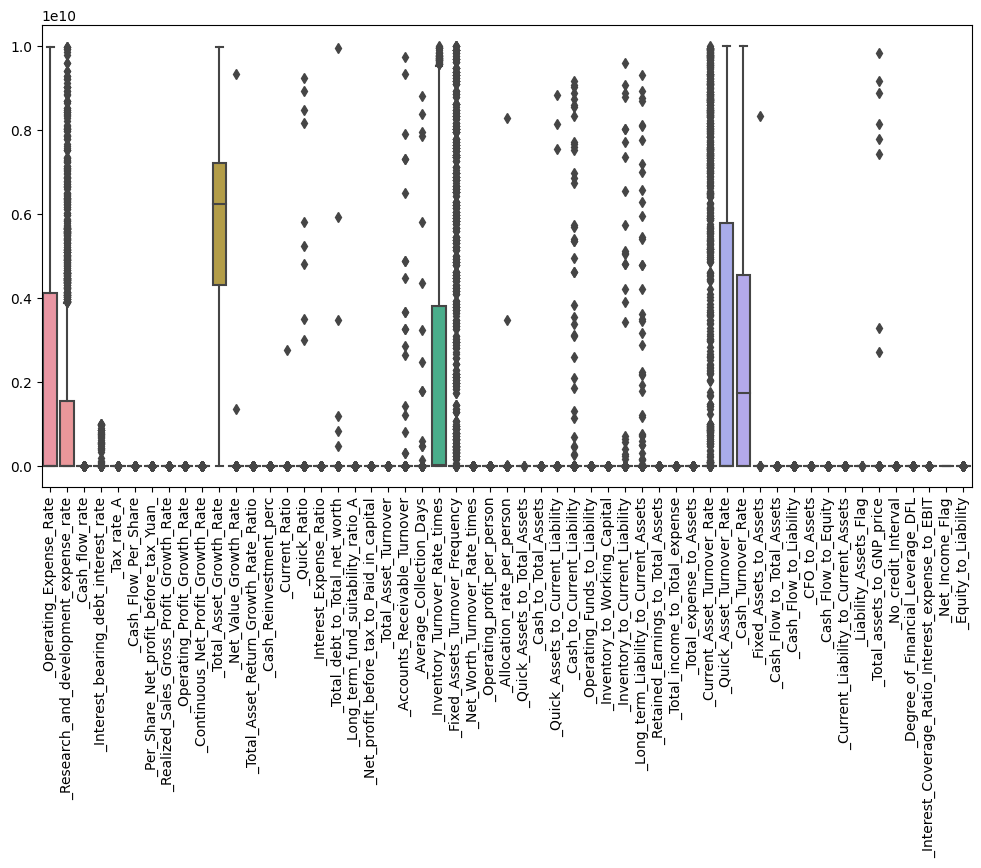

In [831]:
plt.figure(figsize=(12,6))
sns.boxplot(data=x_com)
plt.xticks(rotation=90);

In [832]:
def detect_outlier(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    return LL,UL

In [833]:
for i in x_com:
    ll,ul=detect_outlier(x_com[i])
    x_com[i]=np.where(x_com[i]>ul,ul,x_com[i])
    x_com[i]=np.where(x_com[i]<ll,ll,x_com[i])

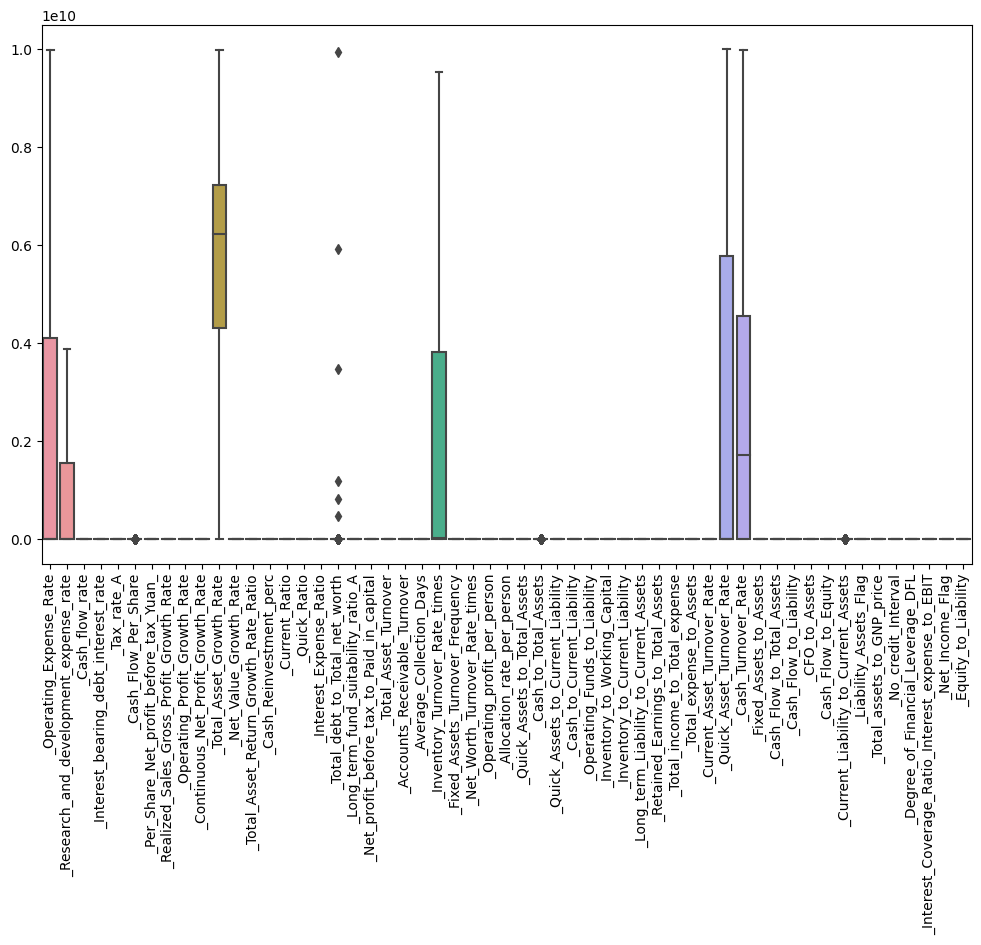

In [834]:
plt.figure(figsize=(12,7))
sns.boxplot(data=x_com)
plt.xticks(rotation=90);

<AxesSubplot: >

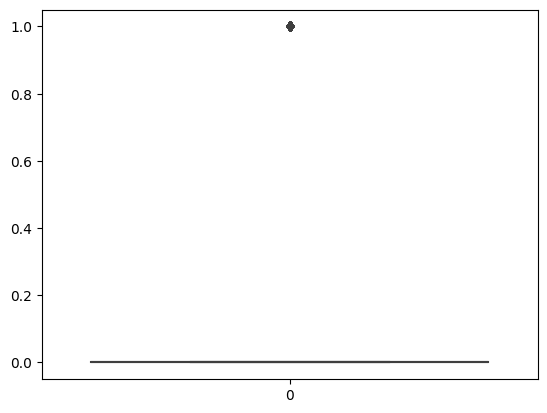

In [835]:
sns.boxplot(y_com)

# SCALING :

In [836]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_xcom = pd.DataFrame(scaler.fit_transform(x_com), columns = x_com.columns)

In [837]:
xy_com=pd.concat([scaled_xcom,y_com],axis=1)

# MISSING VALUES :

In [838]:
 xy_com.isnull().sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                                           0
_Interest_Expense_Ratio                                0
_Total_debt_to_Total_net_worth 

In [839]:
xy_com._Cash_Flow_Per_Share.fillna(xy_com._Cash_Flow_Per_Share.median(),inplace=True)
xy_com._Total_debt_to_Total_net_worth.fillna(xy_com._Total_debt_to_Total_net_worth.median(),inplace=True)
xy_com._Current_Liability_to_Current_Assets.fillna(xy_com._Current_Liability_to_Current_Assets.median(),inplace=True)
xy_com._Cash_to_Total_Assets.fillna(xy_com._Cash_to_Total_Assets.median(),inplace=True)

In [840]:
xy_com.isnull().sum()

_Operating_Expense_Rate                              0
_Research_and_development_expense_rate               0
_Cash_flow_rate                                      0
_Interest_bearing_debt_interest_rate                 0
_Tax_rate_A                                          0
_Cash_Flow_Per_Share                                 0
_Per_Share_Net_profit_before_tax_Yuan_               0
_Realized_Sales_Gross_Profit_Growth_Rate             0
_Operating_Profit_Growth_Rate                        0
_Continuous_Net_Profit_Growth_Rate                   0
_Total_Asset_Growth_Rate                             0
_Net_Value_Growth_Rate                               0
_Total_Asset_Return_Growth_Rate_Ratio                0
_Cash_Reinvestment_perc                              0
_Current_Ratio                                       0
_Quick_Ratio                                         0
_Interest_Expense_Ratio                              0
_Total_debt_to_Total_net_worth                       0
_Long_term

Finally, we have the dataset with Outliers treated and all missing values replaced using median of the respective column.

# UNIVARIATE ANALYSIS :

<AxesSubplot: xlabel='Default', ylabel='count'>

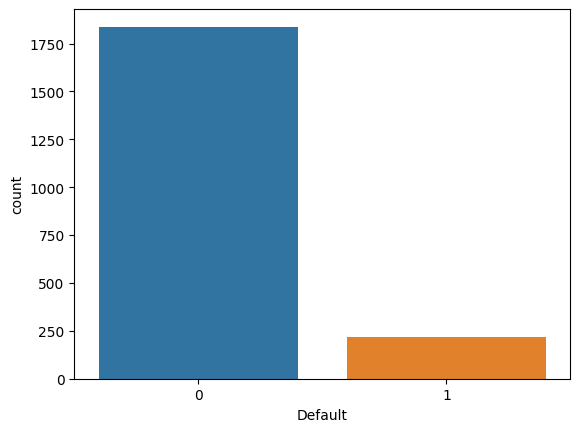

In [841]:
sns.countplot(x=y_com)

<AxesSubplot: xlabel='_Liability_Assets_Flag', ylabel='count'>

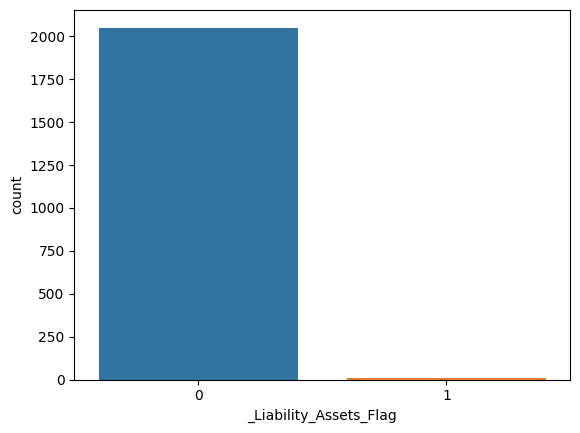

In [842]:
sns.countplot(x='_Liability_Assets_Flag',data=com)

In [843]:
com._Liability_Assets_Flag.value_counts()

0    2051
1       7
Name: _Liability_Assets_Flag, dtype: int64

<AxesSubplot: xlabel='_Net_profit_before_tax_to_Paid_in_capital', ylabel='Count'>

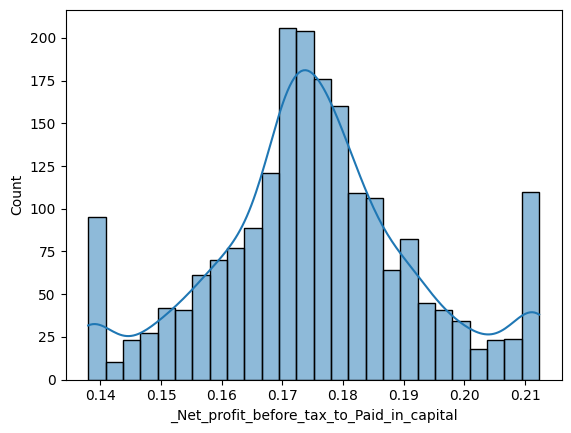

In [844]:
sns.histplot(x='_Net_profit_before_tax_to_Paid_in_capital',data=x_com,kde=True)

In [845]:
com.groupby(['Default'])['_Net_profit_before_tax_to_Paid_in_capital'].mean()

Default
0   0.18
1   0.15
Name: _Net_profit_before_tax_to_Paid_in_capital, dtype: float64

<AxesSubplot: xlabel='_Current_Ratio', ylabel='Count'>

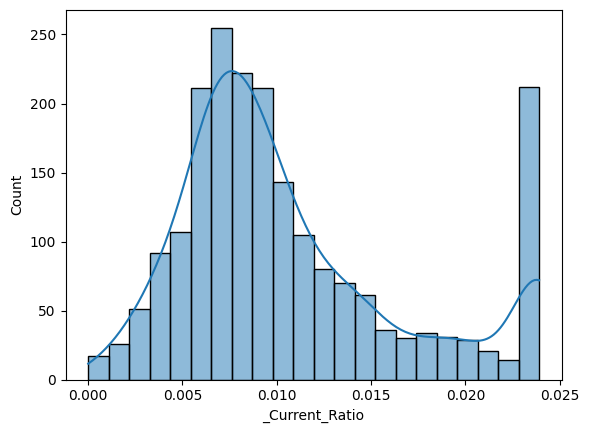

In [846]:
sns.histplot(x='_Current_Ratio',data=x_com,kde=True)

In [849]:
com.groupby(['Default'])['_Current_Ratio'].mean()

Default
0   1496191.53
1         0.01
Name: _Current_Ratio, dtype: float64

<AxesSubplot: xlabel='_Quick_Ratio', ylabel='Count'>

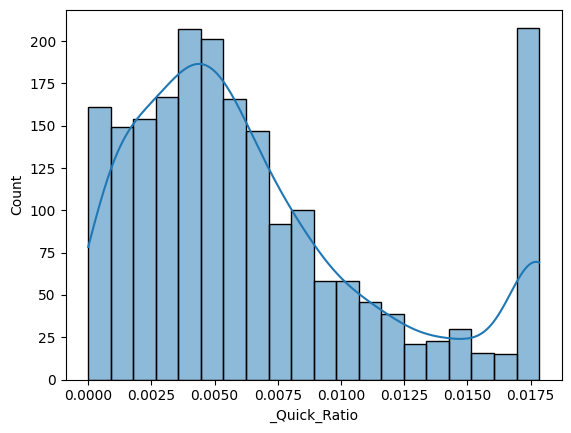

In [847]:
sns.histplot(x='_Quick_Ratio',data=x_com,kde=True)

<AxesSubplot: xlabel='_Cash_Reinvestment_perc'>

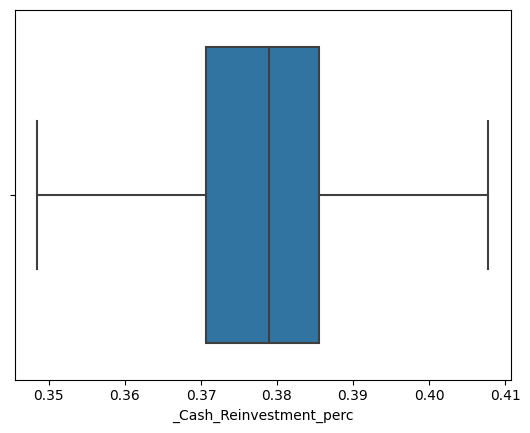

In [848]:
sns.boxplot(x='_Cash_Reinvestment_perc',data=x_com)

In [850]:
com.groupby(['Default'])['_Cash_Reinvestment_perc'].mean()

Default
0   0.38
1   0.37
Name: _Cash_Reinvestment_perc, dtype: float64

# BIVARIATE ANALYSIS :

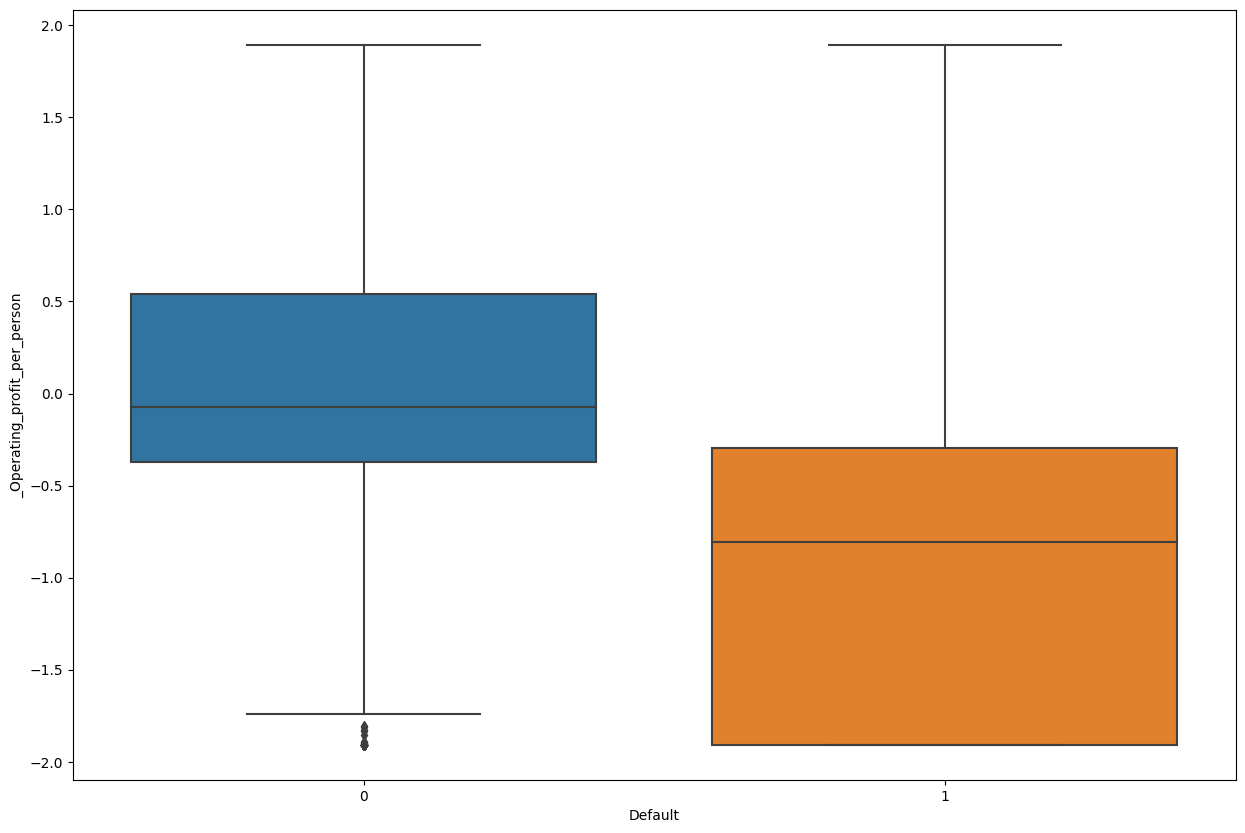

In [851]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Default',y='_Operating_profit_per_person',data=xy_com);

In [852]:
com.groupby(['Default'])['_Operating_profit_per_person'].mean()

Default
0   0.41
1   0.38
Name: _Operating_profit_per_person, dtype: float64

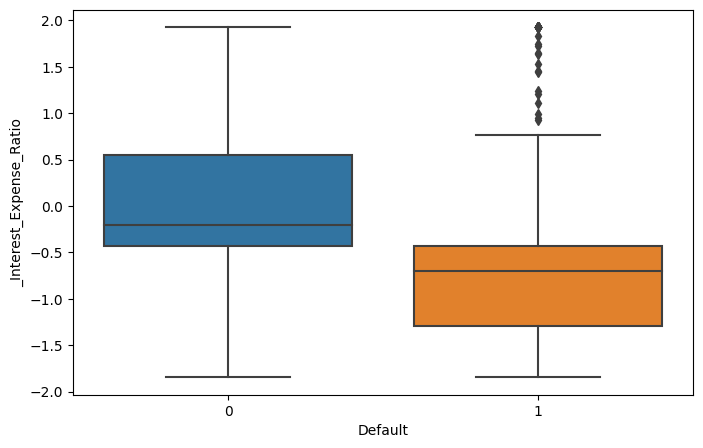

In [853]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Default',y='_Interest_Expense_Ratio',data=xy_com);

In [854]:
com.groupby(['Default'])['_Interest_Expense_Ratio'].mean()

Default
0   0.63
1   0.63
Name: _Interest_Expense_Ratio, dtype: float64

<AxesSubplot: xlabel='Default', ylabel='_Total_income_to_Total_expense'>

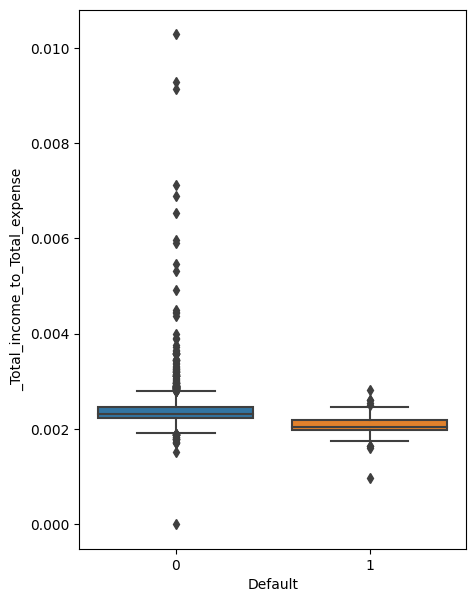

In [855]:
plt.figure(figsize=(5, 7))
sns.boxplot(data=com, x='Default', y='_Total_income_to_Total_expense')


<AxesSubplot: xlabel='Default', ylabel='_Research_and_development_expense_rate'>

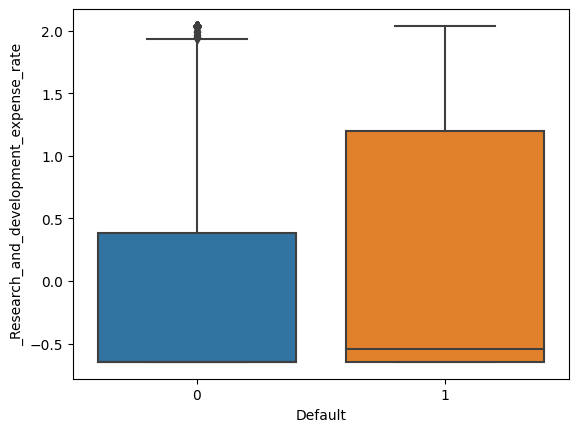

In [857]:
sns.boxplot(x='Default',y='_Research_and_development_expense_rate',data=xy_com)

In [858]:
com.groupby(['Default'])['_Research_and_development_expense_rate'].mean()

Default
0   1161116539.72
1   1605623181.82
Name: _Research_and_development_expense_rate, dtype: float64

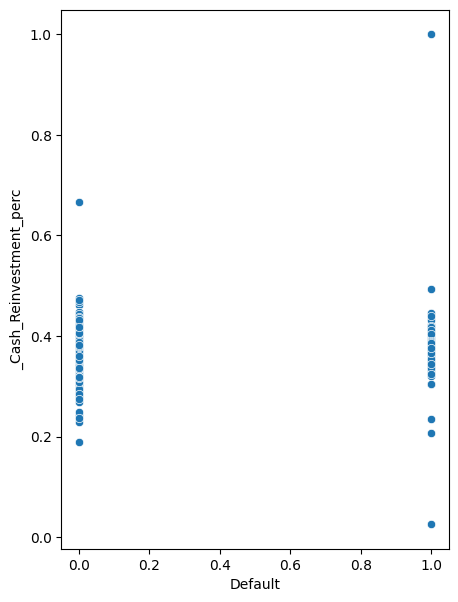

In [859]:
plt.figure(figsize=(5,7))
sns.scatterplot(x=com['Default'],y=com['_Cash_Reinvestment_perc']);

In [860]:
com.groupby(['Default'])['_Allocation_rate_per_person'].mean()

Default
0    4517519.07
1   15818181.85
Name: _Allocation_rate_per_person, dtype: float64

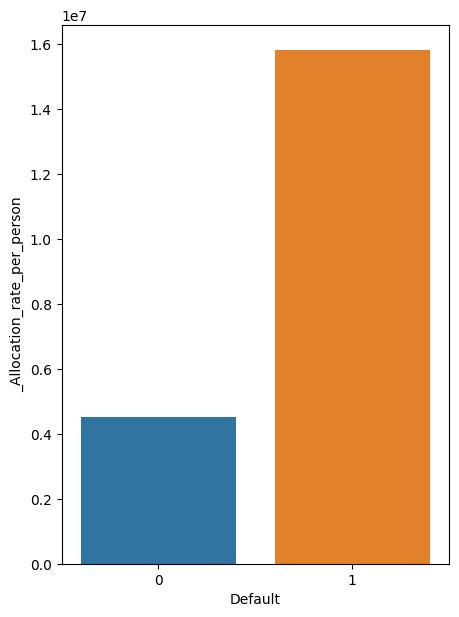

In [861]:
plt.figure(figsize=(5,7))
sns.barplot(x=com['Default'],y=com['_Allocation_rate_per_person'],ci=True);

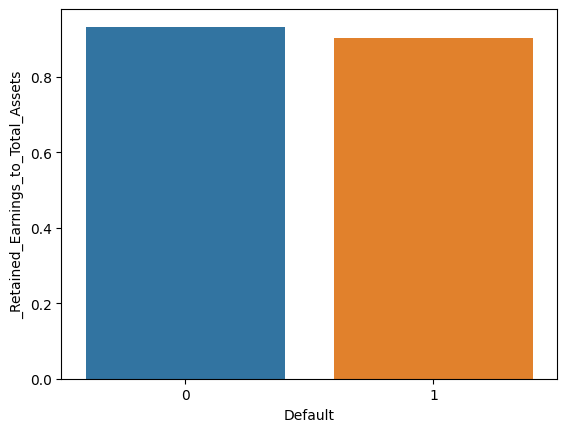

In [862]:
sns.barplot(x=com['Default'],y=com['_Retained_Earnings_to_Total_Assets'],ci=True,data=com);

In [863]:
com.groupby(['Default'])['_Total_expense_to_Assets'].mean()

Default
0   0.03
1   0.05
Name: _Total_expense_to_Assets, dtype: float64

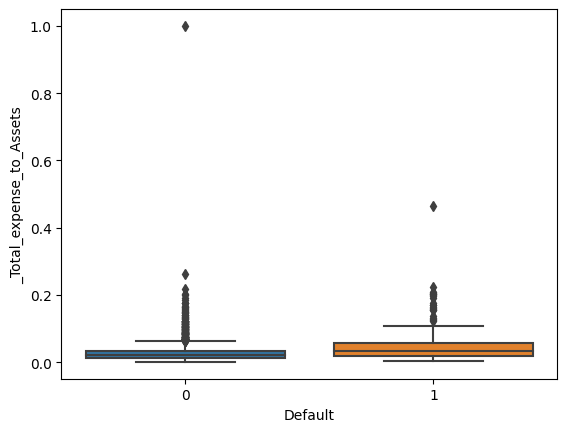

In [864]:
sns.boxplot(x=com['Default'],y=com['_Total_expense_to_Assets']);

In [865]:
com.groupby(['Default'])['_Cash_to_Total_Assets'].mean()

Default
0   0.08
1   0.05
Name: _Cash_to_Total_Assets, dtype: float64

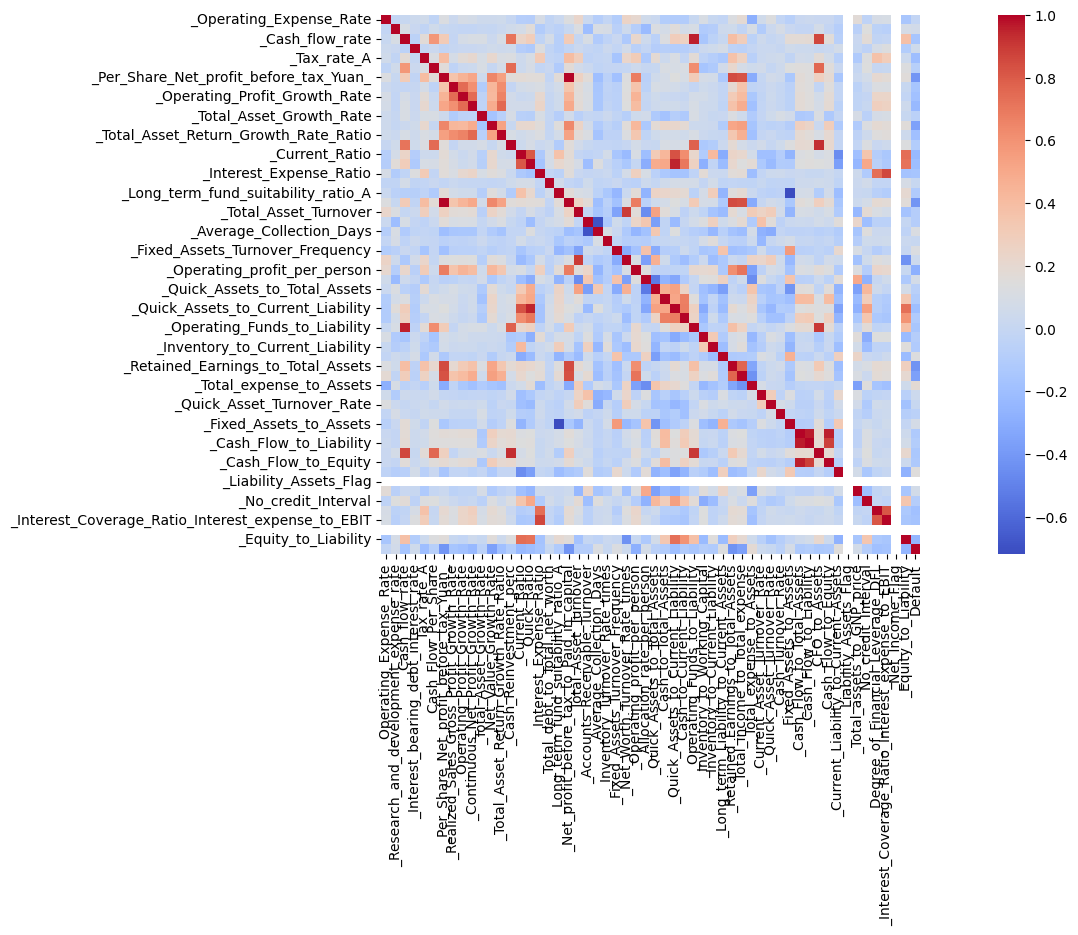

In [565]:
plt.figure(figsize=(20,7))
sns.heatmap(xy_com.corr(),annot=False,cmap='coolwarm',square=True);

# REMOVE MULTICOLLINEARITY :

In [566]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(x):
    #calculating VIF
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i)for i in range (X.shape[1])]
    return(vif)

In [567]:
X = xy_com.drop('Default', axis=1)  # dropping the response col.
cal_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
6,_Per_Share_Net_profit_before_tax_Yuan_,99.01
19,_Net_profit_before_tax_to_Paid_in_capital,98.77
43,_Cash_Flow_to_Total_Assets,44.44
45,_CFO_to_Assets,28.08
32,_Operating_Funds_to_Liability,21.15
30,_Quick_Assets_to_Current_Liability,19.91
44,_Cash_Flow_to_Liability,17.85
2,_Cash_flow_rate,16.52
46,_Cash_Flow_to_Equity,15.11
15,_Quick_Ratio,12.45


In [568]:
X = X.drop('_Per_Share_Net_profit_before_tax_Yuan_', axis=1)
cal_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
42,_Cash_Flow_to_Total_Assets,44.41
44,_CFO_to_Assets,28.02
31,_Operating_Funds_to_Liability,21.14
29,_Quick_Assets_to_Current_Liability,19.90
43,_Cash_Flow_to_Liability,17.85
2,_Cash_flow_rate,16.52
45,_Cash_Flow_to_Equity,15.08
14,_Quick_Ratio,12.44
12,_Cash_Reinvestment_perc,12.27
13,_Current_Ratio,11.00


In [569]:
X= X.drop('_Cash_Flow_to_Total_Assets', axis=1)
cal_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
43,_CFO_to_Assets,27.79
31,_Operating_Funds_to_Liability,21.12
29,_Quick_Assets_to_Current_Liability,19.88
2,_Cash_flow_rate,16.50
14,_Quick_Ratio,12.42
12,_Cash_Reinvestment_perc,12.04
13,_Current_Ratio,11.00
19,_Total_Asset_Turnover,10.93
24,_Net_Worth_Turnover_Rate_times,10.56
18,_Net_profit_before_tax_to_Paid_in_capital,8.24


In [570]:
X= X.drop('_CFO_to_Assets', axis=1)
cal_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
29,_Quick_Assets_to_Current_Liability,19.87
31,_Operating_Funds_to_Liability,18.80
2,_Cash_flow_rate,15.92
14,_Quick_Ratio,12.42
13,_Current_Ratio,11.00
19,_Total_Asset_Turnover,10.90
24,_Net_Worth_Turnover_Rate_times,10.52
18,_Net_profit_before_tax_to_Paid_in_capital,7.97
27,_Quick_Assets_to_Total_Assets,6.32
49,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.06


In [571]:
X= X.drop('_Quick_Assets_to_Current_Liability', axis=1)
cal_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
30,_Operating_Funds_to_Liability,18.60
2,_Cash_flow_rate,15.68
19,_Total_Asset_Turnover,10.89
24,_Net_Worth_Turnover_Rate_times,10.52
13,_Current_Ratio,8.49
18,_Net_profit_before_tax_to_Paid_in_capital,7.94
14,_Quick_Ratio,7.89
48,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.06
27,_Quick_Assets_to_Total_Assets,5.57
35,_Total_income_to_Total_expense,5.19


In [572]:
X= X.drop(['_Operating_Funds_to_Liability','_Cash_flow_rate'], axis=1)
cal_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
18,_Total_Asset_Turnover,10.78
23,_Net_Worth_Turnover_Rate_times,10.40
12,_Current_Ratio,8.26
17,_Net_profit_before_tax_to_Paid_in_capital,7.90
13,_Quick_Ratio,7.74
46,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.04
26,_Quick_Assets_to_Total_Assets,5.46
40,_Cash_Flow_to_Equity,5.09
32,_Retained_Earnings_to_Total_Assets,5.05
33,_Total_income_to_Total_expense,5.05


In [573]:
X= X.drop(['_Total_Asset_Turnover'], axis=1)
cal_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
12,_Current_Ratio,8.24
17,_Net_profit_before_tax_to_Paid_in_capital,7.88
13,_Quick_Ratio,7.72
45,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.03
25,_Quick_Assets_to_Total_Assets,5.38
39,_Cash_Flow_to_Equity,5.09
32,_Total_income_to_Total_expense,5.02
31,_Retained_Earnings_to_Total_Assets,4.93
38,_Cash_Flow_to_Liability,4.91
37,_Fixed_Assets_to_Assets,4.67


In [574]:
X= X.drop(['_Current_Ratio'], axis=1)
cal_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
16,_Net_profit_before_tax_to_Paid_in_capital,7.87
44,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.01
24,_Quick_Assets_to_Total_Assets,5.31
12,_Quick_Ratio,5.11
38,_Cash_Flow_to_Equity,5.09
31,_Total_income_to_Total_expense,5.02
30,_Retained_Earnings_to_Total_Assets,4.93
37,_Cash_Flow_to_Liability,4.91
36,_Fixed_Assets_to_Assets,4.66
13,_Interest_Expense_Ratio,4.51


In [575]:
X= X.drop(['_Net_profit_before_tax_to_Paid_in_capital'], axis=1)
cal_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
43,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,5.98
23,_Quick_Assets_to_Total_Assets,5.31
12,_Quick_Ratio,5.11
37,_Cash_Flow_to_Equity,5.06
36,_Cash_Flow_to_Liability,4.86
35,_Fixed_Assets_to_Assets,4.65
13,_Interest_Expense_Ratio,4.43
30,_Total_income_to_Total_expense,4.20
45,_Equity_to_Liability,3.96
6,_Operating_Profit_Growth_Rate,3.63


In [576]:
X= X.drop(['_Interest_Coverage_Ratio_Interest_expense_to_EBIT','_Quick_Assets_to_Total_Assets'], axis=1)
cal_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
36,_Cash_Flow_to_Equity,5.06
35,_Cash_Flow_to_Liability,4.86
34,_Fixed_Assets_to_Assets,4.35
29,_Total_income_to_Total_expense,4.15
12,_Quick_Ratio,4.11
43,_Equity_to_Liability,3.80
6,_Operating_Profit_Growth_Rate,3.61
28,_Retained_Earnings_to_Total_Assets,3.49
7,_Continuous_Net_Profit_Growth_Rate,3.44
24,_Cash_to_Current_Liability,3.30


In [577]:
X= X.drop(['_Cash_Flow_to_Equity'], axis=1)
cal_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
34,_Fixed_Assets_to_Assets,4.35
29,_Total_income_to_Total_expense,4.15
12,_Quick_Ratio,4.11
42,_Equity_to_Liability,3.79
6,_Operating_Profit_Growth_Rate,3.61
28,_Retained_Earnings_to_Total_Assets,3.48
7,_Continuous_Net_Profit_Growth_Rate,3.43
24,_Cash_to_Current_Liability,3.27
10,_Total_Asset_Return_Growth_Rate_Ratio,3.00
21,_Operating_profit_per_person,2.91


In [578]:
X = X.drop(['_Net_Income_Flag','_Liability_Assets_Flag'], axis=1)
cal_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
34,_Fixed_Assets_to_Assets,4.35
29,_Total_income_to_Total_expense,4.15
12,_Quick_Ratio,4.11
40,_Equity_to_Liability,3.79
6,_Operating_Profit_Growth_Rate,3.61
28,_Retained_Earnings_to_Total_Assets,3.48
7,_Continuous_Net_Profit_Growth_Rate,3.43
24,_Cash_to_Current_Liability,3.27
10,_Total_Asset_Return_Growth_Rate_Ratio,3.00
21,_Operating_profit_per_person,2.91


 Now all variables have VIF <5

In [579]:
X.shape

(2058, 41)

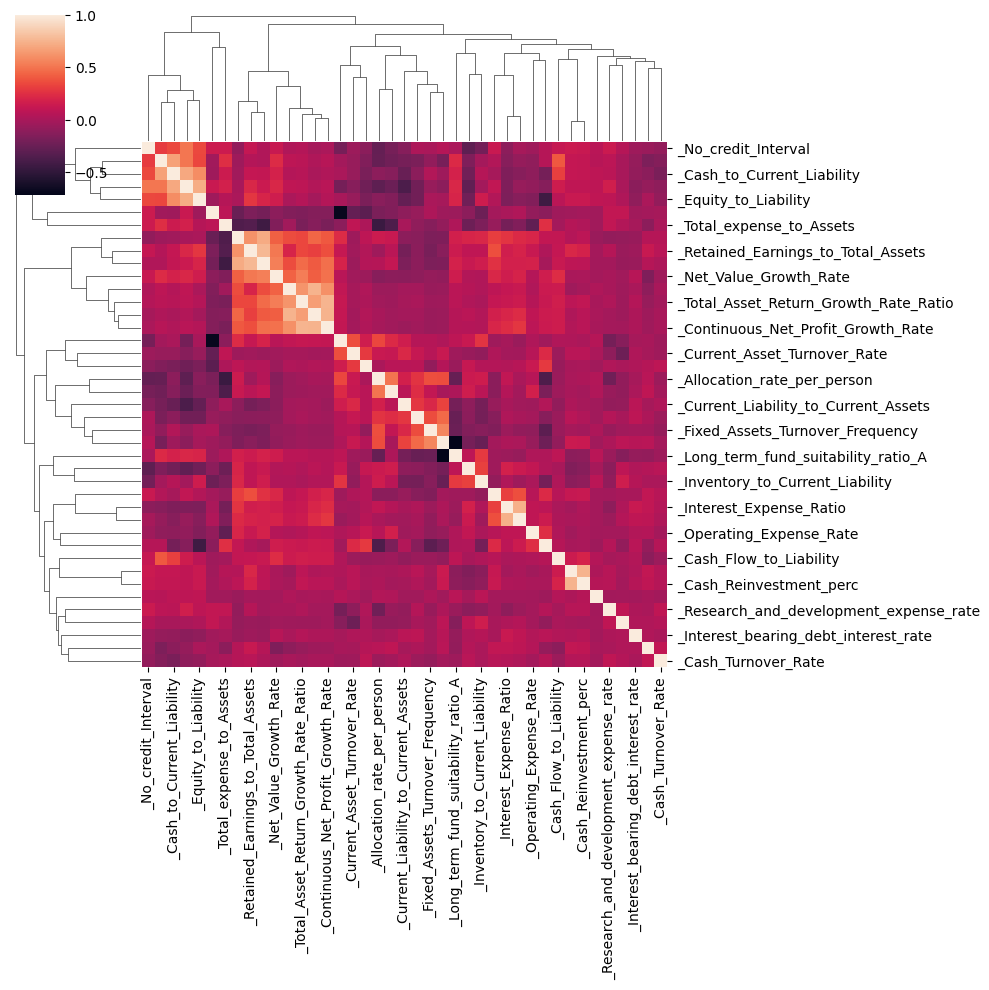

In [580]:
sns.clustermap(X.corr())

In [581]:
X=X.drop(['_Cash_to_Current_Liability','_Cash_Flow_to_Liability','_Interest_Expense_Ratio'],axis=1)
X.shape

(2058, 38)

In [582]:
X=X.drop(['_Retained_Earnings_to_Total_Assets','_Continuous_Net_Profit_Growth_Rate','_Total_Asset_Return_Growth_Rate_Ratio','_Fixed_Assets_to_Assets'],axis=1)

In [583]:
X=X.drop(['_Quick_Ratio','_Equity_to_Liability','_Cash_Flow_Per_Share'],axis=1)

In [584]:
X=X.drop(['_Realized_Sales_Gross_Profit_Growth_Rate','_Operating_profit_per_person'],axis=1)

In [585]:
X=X.drop('_Net_Value_Growth_Rate',axis=1)

In [586]:
X.shape

(2058, 28)

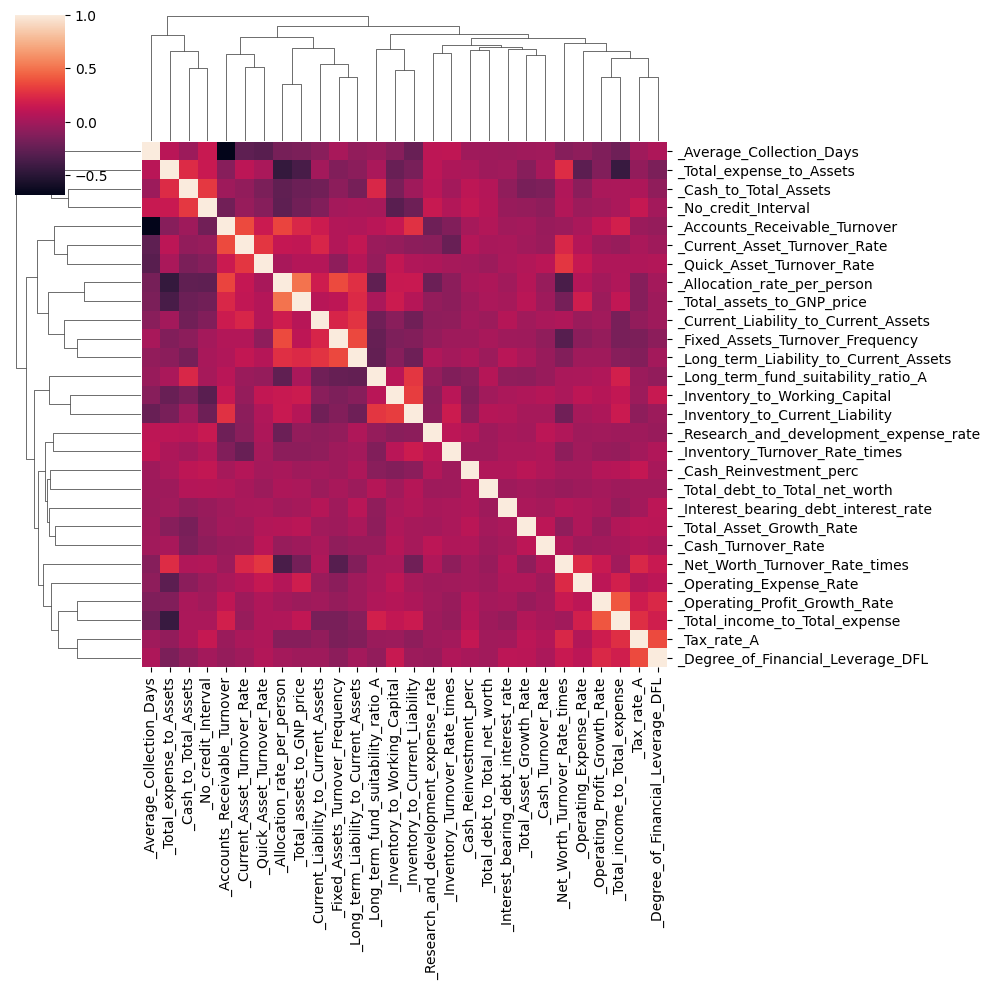

In [587]:
sns.clustermap(X.corr())

# PART A: Train Test Split

In [588]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_com, test_size =0.33, random_state=42)

In [589]:
X_train.shape

(1378, 28)

In [590]:
y_train.shape

(1378,)

In [591]:
X_test.shape

(680, 28)

In [592]:
y_test.shape

(680,)

In [593]:
train_XY=pd.concat([X_train,y_train],axis=1)
test_XY=pd.concat([X_test,y_test],axis=1)

# PART A: Build Logistic Regression Model (using statsmodels library) on most important variables on train dataset and choose the optimum cut-off. Also showcase your model building approach
​

In [594]:
import statsmodels.formula.api as SM

In [595]:
X.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Interest_bearing_debt_interest_rate', '_Tax_rate_A',
       '_Operating_Profit_Growth_Rate', '_Total_Asset_Growth_Rate',
       '_Cash_Reinvestment_perc', '_Total_debt_to_Total_net_worth',
       '_Long_term_fund_suitability_ratio_A', '_Accounts_Receivable_Turnover',
       '_Average_Collection_Days', '_Inventory_Turnover_Rate_times',
       '_Fixed_Assets_Turnover_Frequency', '_Net_Worth_Turnover_Rate_times',
       '_Allocation_rate_per_person', '_Cash_to_Total_Assets',
       '_Inventory_to_Working_Capital', '_Inventory_to_Current_Liability',
       '_Long_term_Liability_to_Current_Assets',
       '_Total_income_to_Total_expense', '_Total_expense_to_Assets',
       '_Current_Asset_Turnover_Rate', '_Quick_Asset_Turnover_Rate',
       '_Cash_Turnover_Rate', '_Current_Liability_to_Current_Assets',
       '_Total_assets_to_GNP_price', '_No_credit_Interval',
       '_Degree_of_Financial_Leverage_DFL'],
 

In [596]:
import statsmodels.api as sm

Xs = sm.add_constant(X_train)
res = sm.Logit(y_train, Xs).fit()

Optimization terminated successfully.
         Current function value: 0.218430
         Iterations 8


In [597]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1349
Method:                           MLE   Df Model:                           28
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.3735
Time:                        13:08:37   Log-Likelihood:                -301.00
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 3.981e-59
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -3.4922      0.202    -17.262      0.000      -3.889      -3.096
_Operating_Expense_Rate                    0.0013      0.126      0.011      0.992      -0.246       0.249
_Research_and_development_expense_rate     0.3690      0.110      3.361      0.001       0.154       0.584
_Interest_bearing_debt_interest_rate       0.3208      0.126      2.536      0.011       0.073       0.569
_Tax_rate_A                               -0.3054      0.164     -1.863      0.062      -0.627       0.016
_Operating_Profit_Growth_Rate              0.1072      0.112      0.957      0.339      -0.112       0.327
_Total_Asset_Growth_Rate                  -0.1410      0.122     -1.158      0.247      -0.380       0.098
_Cash_Reinvestment_perc                   -0.3474      0.112     -3.113      0.002      -0.566      -0.129
_Total_debt_to_Total_net_worth             0.1111      0.074      1.494      0.135      -0.035       0.257
_Long_term_fund_suitability_ratio_A        0.0047      0.149      0.032      0.975      -0.287       0.297
_Accounts_Receivable_Turnover             -0.2584      0.174     -1.481      0.139      -0.600       0.084
_Average_Collection_Days                   0.2089      0.145      1.438      0.150      -0.076       0.494
_Inventory_Turnover_Rate_times             0.1127      0.116      0.974      0.330      -0.114       0.339
_Fixed_Assets_Turnover_Frequency           0.1393      0.126      1.109      0.268      -0.107       0.385
_Net_Worth_Turnover_Rate_times             0.5767      0.145      3.980      0.000       0.293       0.861
_Allocation_rate_per_person                0.7374      0.175      4.212      0.000       0.394       1.081
_Cash_to_Total_Assets                     -0.4702      0.198     -2.370      0.018      -0.859      -0.081
_Inventory_to_Working_Capital             -0.0768      0.103     -0.744      0.457      -0.279       0.126
_Inventory_to_Current_Liability           -0.1071      0.159     -0.673      0.501      -0.419       0.205
_Long_term_Liability_to_Current_Assets     0.0015      0.119      0.012      0.990      -0.232       0.235
_Total_income_to_Total_expense            -1.3732      0.213     -6.438      0.000      -1.791      -0.955
_Total_expense_to_Assets                   0.5658      0.144      3.928      0.000       0.283       0.848
_Current_Asset_Turnover_Rate              -0.1607      0.123     -1.302      0.193      -0.403       0.081
_Quick_Asset_Turnover_Rate                 0.0572      0.122      0.468      0.639      -0.182       0.296
_Cash_Turnover_Rate                       -0.1823      0.119     -1.535      0.125      -0.415       0.051
_Current_Liability_to_Current_Assets       0.1592      0.112      1.418      0.156      -0.061       0.379
_Total_assets_to_GNP_price                 0.2055      0.130      1.581      0.114      -0.049       0.460
_No_credit_Interval            

In [598]:
X=X.drop(['_Operating_Expense_Rate','_Long_term_fund_suitability_ratio_A','_Long_term_Liability_to_Current_Assets'],axis=1)

In [599]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_com, test_size =0.33, random_state=42)
Xs = sm.add_constant(X_train)
res = sm.Logit(y_train, Xs).fit()

Optimization terminated successfully.
         Current function value: 0.218430
         Iterations 8


In [600]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1352
Method:                           MLE   Df Model:                           25
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.3735
Time:                        13:17:09   Log-Likelihood:                -301.00
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 7.472e-61
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -3.4923      0.202    -17.270      0.000      -3.889      -3.096
_Research_and_development_expense_rate     0.3689      0.109      3.395      0.001       0.156       0.582
_Interest_bearing_debt_interest_rate       0.3205      0.125      2.554      0.011       0.075       0.566
_Tax_rate_A                               -0.3054      0.163     -1.874      0.061      -0.625       0.014
_Operating_Profit_Growth_Rate              0.1074      0.112      0.959      0.337      -0.112       0.327
_Total_Asset_Growth_Rate                  -0.1411      0.122     -1.160      0.246      -0.380       0.097
_Cash_Reinvestment_perc                   -0.3476      0.110     -3.154      0.002      -0.564      -0.132
_Total_debt_to_Total_net_worth             0.1112      0.074      1.501      0.133      -0.034       0.256
_Accounts_Receivable_Turnover             -0.2584      0.173     -1.497      0.134      -0.597       0.080
_Average_Collection_Days                   0.2088      0.143      1.461      0.144      -0.071       0.489
_Inventory_Turnover_Rate_times             0.1120      0.112      0.999      0.318      -0.108       0.332
_Fixed_Assets_Turnover_Frequency           0.1392      0.121      1.150      0.250      -0.098       0.377
_Net_Worth_Turnover_Rate_times             0.5769      0.140      4.106      0.000       0.302       0.852
_Allocation_rate_per_person                0.7361      0.170      4.334      0.000       0.403       1.069
_Cash_to_Total_Assets                     -0.4698      0.197     -2.379      0.017      -0.857      -0.083
_Inventory_to_Working_Capital             -0.0768      0.103     -0.745      0.456      -0.279       0.125
_Inventory_to_Current_Liability           -0.1060      0.152     -0.698      0.485      -0.404       0.192
_Total_income_to_Total_expense            -1.3730      0.213     -6.445      0.000      -1.791      -0.955
_Total_expense_to_Assets                   0.5653      0.138      4.111      0.000       0.296       0.835
_Current_Asset_Turnover_Rate              -0.1604      0.123     -1.304      0.192      -0.402       0.081
_Quick_Asset_Turnover_Rate                 0.0574      0.122      0.472      0.637      -0.181       0.296
_Cash_Turnover_Rate                       -0.1827      0.118     -1.548      0.122      -0.414       0.049
_Current_Liability_to_Current_Assets       0.1587      0.109      1.453      0.146      -0.055       0.373
_Total_assets_to_GNP_price                 0.2064      0.125      1.649      0.099      -0.039       0.452
_No_credit_Interval                       -0.3080      0.112     -2.749      0.006      -0.528      -0.088
_Degree_of_Financial_Leverage_DFL          0.0210      0.115      0.183      0.855      -0.204       0.245
==========================================================================================================
"""

In [602]:
f1='Default ~_Research_and_development_expense_rate+_Interest_bearing_debt_interest_rate+_Tax_rate_A+_Operating_Profit_Growth_Rate+_Cash_Reinvestment_perc+_Total_debt_to_Total_net_worth+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Inventory_Turnover_Rate_times+_Fixed_Assets_Turnover_Frequency+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Inventory_to_Working_Capital+_Inventory_to_Current_Liability+_Total_income_to_Total_expense+_Total_expense_to_Assets+_Current_Asset_Turnover_Rate+_Quick_Asset_Turnover_Rate+_Cash_Turnover_Rate+_Current_Liability_to_Current_Assets+_Total_assets_to_GNP_price+_No_credit_Interval+_Degree_of_Financial_Leverage_DFL'

In [605]:
model_1=SM.logit(formula=f1, data=test_XY).fit()

         Current function value: 0.206294
         Iterations: 35


In [606]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  680
Model:                          Logit   Df Residuals:                      655
Method:                           MLE   Df Model:                           24
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.3590
Time:                        13:25:58   Log-Likelihood:                -140.28
converged:                      False   LL-Null:                       -218.85
Covariance Type:            nonrobust   LLR p-value:                 1.542e-21
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.8586   1252.756     -0.003      0.998   -2459.216    2451.499
_Research_and_development_expense_rate     0.1197      0.163      0.735      0.462      -0.200       0.439
_Interest_bearing_debt_interest_rate       0.0657      0.180      0.365      0.715      -0.287       0.418
_Tax_rate_A                               -0.3033      0.254     -1.194      0.232      -0.801       0.195
_Operating_Profit_Growth_Rate              0.0149      0.171      0.087      0.930      -0.320       0.350
_Cash_Reinvestment_perc                    0.0574      0.164      0.350      0.727      -0.264       0.379
_Total_debt_to_Total_net_worth            -4.2309   3.15e+04     -0.000      1.000   -6.18e+04    6.18e+04
_Accounts_Receivable_Turnover             -0.4097      0.316     -1.298      0.194      -1.029       0.209
_Average_Collection_Days                   0.1827      0.277      0.659      0.510      -0.361       0.726
_Inventory_Turnover_Rate_times            -0.0356      0.183     -0.195      0.845      -0.394       0.322
_Fixed_Assets_Turnover_Frequency          -0.0150      0.198     -0.076      0.940      -0.403       0.373
_Net_Worth_Turnover_Rate_times             0.3475      0.197      1.764      0.078      -0.039       0.733
_Allocation_rate_per_person                0.2864      0.256      1.120      0.263      -0.215       0.788
_Cash_to_Total_Assets                     -0.4962      0.232     -2.143      0.032      -0.950      -0.042
_Inventory_to_Working_Capital             -0.0678      0.162     -0.418      0.676      -0.386       0.250
_Inventory_to_Current_Liability           -0.1748      0.218     -0.800      0.424      -0.603       0.253
_Total_income_to_Total_expense            -1.5784      0.323     -4.881      0.000      -2.212      -0.945
_Total_expense_to_Assets                   0.4998      0.189      2.642      0.008       0.129       0.871
_Current_Asset_Turnover_Rate              -0.0587      0.181     -0.325      0.746      -0.413       0.296
_Quick_Asset_Turnover_Rate                 0.1210      0.190      0.636      0.525      -0.252       0.494
_Cash_Turnover_Rate                       -0.5279      0.213     -2.481      0.013      -0.945      -0.111
_Current_Liability_to_Current_Assets       0.0426      0.110      0.388      0.698      -0.173       0.258
_Total_assets_to_GNP_price                 0.3587      0.193      1.862      0.063      -0.019       0.736
_No_credit_Interval                       -0.0852      0.182     -0.467      0.640      -0.443       0.272
_Degree_of_Financial_Leverage_DFL          0.0732      0.187      0.392      0.695      -0.293       0.439
==========================================================================================================
"""

In [607]:
f2='Default ~_Research_and_development_expense_rate+_Interest_bearing_debt_interest_rate+_Tax_rate_A+_Cash_Reinvestment_perc+_Total_debt_to_Total_net_worth+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Inventory_Turnover_Rate_times+_Fixed_Assets_Turnover_Frequency+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Inventory_to_Working_Capital+_Inventory_to_Current_Liability+_Total_income_to_Total_expense+_Total_expense_to_Assets+_Current_Asset_Turnover_Rate+_Quick_Asset_Turnover_Rate+_Cash_Turnover_Rate+_Current_Liability_to_Current_Assets+_Total_assets_to_GNP_price+_No_credit_Interval+_Degree_of_Financial_Leverage_DFL'

In [608]:
model_2=SM.logit(formula=f2, data=test_XY).fit()

         Current function value: 0.206299
         Iterations: 35


In [609]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  680
Model:                          Logit   Df Residuals:                      656
Method:                           MLE   Df Model:                           23
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.3590
Time:                        13:28:42   Log-Likelihood:                -140.28
converged:                      False   LL-Null:                       -218.85
Covariance Type:            nonrobust   LLR p-value:                 5.813e-22
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.8542   1231.057     -0.003      0.998   -2416.681    2408.973
_Research_and_development_expense_rate     0.1187      0.163      0.730      0.465      -0.200       0.437
_Interest_bearing_debt_interest_rate       0.0651      0.180      0.362      0.718      -0.288       0.418
_Tax_rate_A                               -0.3038      0.254     -1.196      0.232      -0.802       0.194
_Cash_Reinvestment_perc                    0.0591      0.163      0.363      0.717      -0.260       0.379
_Total_debt_to_Total_net_worth            -4.2230    3.1e+04     -0.000      1.000   -6.07e+04    6.07e+04
_Accounts_Receivable_Turnover             -0.4067      0.314     -1.295      0.195      -1.022       0.209
_Average_Collection_Days                   0.1834      0.277      0.661      0.509      -0.360       0.727
_Inventory_Turnover_Rate_times            -0.0368      0.182     -0.202      0.840      -0.394       0.320
_Fixed_Assets_Turnover_Frequency          -0.0144      0.198     -0.073      0.942      -0.402       0.373
_Net_Worth_Turnover_Rate_times             0.3489      0.196      1.776      0.076      -0.036       0.734
_Allocation_rate_per_person                0.2878      0.255      1.129      0.259      -0.212       0.788
_Cash_to_Total_Assets                     -0.4959      0.232     -2.141      0.032      -0.950      -0.042
_Inventory_to_Working_Capital             -0.0680      0.162     -0.419      0.675      -0.386       0.250
_Inventory_to_Current_Liability           -0.1750      0.218     -0.802      0.423      -0.603       0.253
_Total_income_to_Total_expense            -1.5692      0.305     -5.137      0.000      -2.168      -0.971
_Total_expense_to_Assets                   0.4997      0.189      2.640      0.008       0.129       0.871
_Current_Asset_Turnover_Rate              -0.0608      0.179     -0.340      0.734      -0.412       0.290
_Quick_Asset_Turnover_Rate                 0.1209      0.190      0.636      0.525      -0.252       0.494
_Cash_Turnover_Rate                       -0.5273      0.213     -2.480      0.013      -0.944      -0.111
_Current_Liability_to_Current_Assets       0.0434      0.109      0.396      0.692      -0.171       0.258
_Total_assets_to_GNP_price                 0.3573      0.192      1.862      0.063      -0.019       0.733
_No_credit_Interval                       -0.0871      0.181     -0.480      0.631      -0.442       0.268
_Degree_of_Financial_Leverage_DFL          0.0740      0.186      0.397      0.691      -0.291       0.439
==========================================================================================================
"""

In [611]:
f3='Default ~_Research_and_development_expense_rate+_Tax_rate_A+_Cash_Reinvestment_perc+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Fixed_Assets_Turnover_Frequency+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Inventory_to_Working_Capital+_Inventory_to_Current_Liability+_Total_income_to_Total_expense+_Total_expense_to_Assets+_Current_Asset_Turnover_Rate+_Quick_Asset_Turnover_Rate+_Cash_Turnover_Rate+_Current_Liability_to_Current_Assets+_Total_assets_to_GNP_price+_No_credit_Interval+_Degree_of_Financial_Leverage_DFL'

In [612]:
model_3=SM.logit(formula=f3, data=test_XY).fit()

Optimization terminated successfully.
         Current function value: 0.206433
         Iterations 8


In [621]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  680
Model:                          Logit   Df Residuals:                      659
Method:                           MLE   Df Model:                           20
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.3586
Time:                        13:34:14   Log-Likelihood:                -140.37
converged:                       True   LL-Null:                       -218.85
Covariance Type:            nonrobust   LLR p-value:                 2.904e-23
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6687      0.309    -11.889      0.000      -4.274      -3.064
_Research_and_development_expense_rate     0.1168      0.162      0.719      0.472      -0.202       0.435
_Tax_rate_A                               -0.3028      0.255     -1.189      0.235      -0.802       0.196
_Cash_Reinvestment_perc                    0.0622      0.163      0.381      0.703      -0.258       0.382
_Accounts_Receivable_Turnover             -0.4202      0.312     -1.347      0.178      -1.031       0.191
_Average_Collection_Days                   0.1628      0.271      0.600      0.548      -0.369       0.695
_Fixed_Assets_Turnover_Frequency          -0.0277      0.195     -0.142      0.887      -0.410       0.354
_Net_Worth_Turnover_Rate_times             0.3507      0.194      1.806      0.071      -0.030       0.731
_Allocation_rate_per_person                0.3017      0.249      1.211      0.226      -0.187       0.790
_Cash_to_Total_Assets                     -0.5089      0.230     -2.210      0.027      -0.960      -0.057
_Inventory_to_Working_Capital             -0.0647      0.161     -0.401      0.689      -0.381       0.252
_Inventory_to_Current_Liability           -0.1761      0.217     -0.812      0.417      -0.601       0.249
_Total_income_to_Total_expense            -1.5551      0.302     -5.155      0.000      -2.146      -0.964
_Total_expense_to_Assets                   0.5013      0.188      2.665      0.008       0.133       0.870
_Current_Asset_Turnover_Rate              -0.0586      0.178     -0.329      0.742      -0.407       0.290
_Quick_Asset_Turnover_Rate                 0.1141      0.189      0.603      0.546      -0.257       0.485
_Cash_Turnover_Rate                       -0.5339      0.211     -2.530      0.011      -0.947      -0.120
_Current_Liability_to_Current_Assets       0.0524      0.107      0.489      0.625      -0.157       0.262
_Total_assets_to_GNP_price                 0.3532      0.192      1.842      0.065      -0.023       0.729
_No_credit_Interval                       -0.0909      0.181     -0.502      0.615      -0.445       0.264
_Degree_of_Financial_Leverage_DFL          0.0672      0.186      0.362      0.717      -0.296       0.431
==========================================================================================================
"""

In [623]:
f4='Default ~_Research_and_development_expense_rate+_Tax_rate_A+_Cash_Reinvestment_perc+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Inventory_to_Working_Capital+_Inventory_to_Current_Liability+_Total_income_to_Total_expense+_Total_expense_to_Assets+_Current_Asset_Turnover_Rate+_Quick_Asset_Turnover_Rate+_Cash_Turnover_Rate+_Current_Liability_to_Current_Assets+_Total_assets_to_GNP_price+_No_credit_Interval'

In [624]:
model_4=SM.logit(formula=f4, data=test_XY).fit()

Optimization terminated successfully.
         Current function value: 0.206540
         Iterations 8


In [625]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  680
Model:                          Logit   Df Residuals:                      661
Method:                           MLE   Df Model:                           18
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.3583
Time:                        13:36:00   Log-Likelihood:                -140.45
converged:                       True   LL-Null:                       -218.85
Covariance Type:            nonrobust   LLR p-value:                 3.507e-24
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6513      0.302    -12.093      0.000      -4.243      -3.059
_Research_and_development_expense_rate     0.1119      0.162      0.691      0.490      -0.206       0.429
_Tax_rate_A                               -0.2707      0.240     -1.127      0.260      -0.742       0.200
_Cash_Reinvestment_perc                    0.0577      0.163      0.355      0.723      -0.261       0.377
_Accounts_Receivable_Turnover             -0.4078      0.308     -1.322      0.186      -1.012       0.197
_Average_Collection_Days                   0.1780      0.266      0.670      0.503      -0.343       0.699
_Net_Worth_Turnover_Rate_times             0.3627      0.181      2.009      0.045       0.009       0.717
_Allocation_rate_per_person                0.2905      0.241      1.207      0.227      -0.181       0.762
_Cash_to_Total_Assets                     -0.5040      0.229     -2.197      0.028      -0.954      -0.054
_Inventory_to_Working_Capital             -0.0535      0.158     -0.340      0.734      -0.363       0.256
_Inventory_to_Current_Liability           -0.1713      0.214     -0.802      0.423      -0.590       0.247
_Total_income_to_Total_expense            -1.5170      0.283     -5.354      0.000      -2.072      -0.962
_Total_expense_to_Assets                   0.5035      0.184      2.739      0.006       0.143       0.864
_Current_Asset_Turnover_Rate              -0.0624      0.177     -0.354      0.724      -0.408       0.284
_Quick_Asset_Turnover_Rate                 0.1112      0.189      0.590      0.555      -0.258       0.481
_Cash_Turnover_Rate                       -0.5323      0.210     -2.529      0.011      -0.945      -0.120
_Current_Liability_to_Current_Assets       0.0511      0.106      0.482      0.630      -0.157       0.259
_Total_assets_to_GNP_price                 0.3481      0.187      1.860      0.063      -0.019       0.715
_No_credit_Interval                       -0.0952      0.181     -0.527      0.598      -0.449       0.259
==========================================================================================================
"""

In [626]:
f5='Default ~_Research_and_development_expense_rate+_Tax_rate_A+_Cash_Reinvestment_perc+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Inventory_to_Current_Liability+_Total_income_to_Total_expense+_Total_expense_to_Assets+_Quick_Asset_Turnover_Rate+_Cash_Turnover_Rate+_Total_assets_to_GNP_price+_No_credit_Interval'

In [627]:
model_5=SM.logit(formula=f5, data=test_XY).fit()

Optimization terminated successfully.
         Current function value: 0.206885
         Iterations 8


In [628]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  680
Model:                          Logit   Df Residuals:                      664
Method:                           MLE   Df Model:                           15
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.3572
Time:                        13:38:27   Log-Likelihood:                -140.68
converged:                       True   LL-Null:                       -218.85
Covariance Type:            nonrobust   LLR p-value:                 1.322e-25
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6440      0.300    -12.129      0.000      -4.233      -3.055
_Research_and_development_expense_rate     0.1035      0.161      0.642      0.521      -0.212       0.419
_Tax_rate_A                               -0.2693      0.239     -1.125      0.261      -0.739       0.200
_Cash_Reinvestment_perc                    0.0648      0.159      0.407      0.684      -0.248       0.377
_Accounts_Receivable_Turnover             -0.4038      0.296     -1.364      0.172      -0.984       0.176
_Average_Collection_Days                   0.1693      0.264      0.641      0.521      -0.348       0.687
_Net_Worth_Turnover_Rate_times             0.3601      0.172      2.099      0.036       0.024       0.696
_Allocation_rate_per_person                0.2890      0.228      1.265      0.206      -0.159       0.737
_Cash_to_Total_Assets                     -0.5136      0.230     -2.232      0.026      -0.965      -0.063
_Inventory_to_Current_Liability           -0.1935      0.205     -0.945      0.345      -0.595       0.208
_Total_income_to_Total_expense            -1.5486      0.279     -5.551      0.000      -2.095      -1.002
_Total_expense_to_Assets                   0.4981      0.178      2.798      0.005       0.149       0.847
_Quick_Asset_Turnover_Rate                 0.0847      0.183      0.463      0.644      -0.274       0.444
_Cash_Turnover_Rate                       -0.5091      0.205     -2.483      0.013      -0.911      -0.107
_Total_assets_to_GNP_price                 0.3401      0.187      1.823      0.068      -0.025       0.706
_No_credit_Interval                       -0.1175      0.177     -0.665      0.506      -0.464       0.229
==========================================================================================================
"""

In [629]:
f6='Default ~_Research_and_development_expense_rate+_Tax_rate_A+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Inventory_to_Current_Liability+_Total_income_to_Total_expense+_Total_expense_to_Assets+_Quick_Asset_Turnover_Rate+_Cash_Turnover_Rate+_Total_assets_to_GNP_price'

In [630]:
model_6=SM.logit(formula=f6, data=test_XY).fit()

Optimization terminated successfully.
         Current function value: 0.207316
         Iterations 8


In [631]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  680
Model:                          Logit   Df Residuals:                      666
Method:                           MLE   Df Model:                           13
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.3558
Time:                        13:39:56   Log-Likelihood:                -140.98
converged:                       True   LL-Null:                       -218.85
Covariance Type:            nonrobust   LLR p-value:                 1.425e-26
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6447      0.300    -12.141      0.000      -4.233      -3.056
_Research_and_development_expense_rate     0.0960      0.161      0.598      0.550      -0.219       0.411
_Tax_rate_A                               -0.2626      0.241     -1.091      0.275      -0.734       0.209
_Accounts_Receivable_Turnover             -0.4078      0.293     -1.389      0.165      -0.983       0.167
_Average_Collection_Days                   0.1788      0.259      0.691      0.489      -0.328       0.686
_Net_Worth_Turnover_Rate_times             0.3677      0.170      2.157      0.031       0.034       0.702
_Allocation_rate_per_person                0.2983      0.228      1.308      0.191      -0.149       0.745
_Cash_to_Total_Assets                     -0.5312      0.231     -2.304      0.021      -0.983      -0.079
_Inventory_to_Current_Liability           -0.1664      0.201     -0.826      0.409      -0.561       0.228
_Total_income_to_Total_expense            -1.5518      0.276     -5.624      0.000      -2.093      -1.011
_Total_expense_to_Assets                   0.4889      0.177      2.756      0.006       0.141       0.837
_Quick_Asset_Turnover_Rate                 0.1037      0.181      0.574      0.566      -0.251       0.458
_Cash_Turnover_Rate                       -0.4930      0.204     -2.421      0.015      -0.892      -0.094
_Total_assets_to_GNP_price                 0.3591      0.184      1.949      0.051      -0.002       0.720
==========================================================================================================
"""

In [636]:
f7='Default ~_Research_and_development_expense_rate+_Tax_rate_A+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Inventory_to_Current_Liability+_Total_income_to_Total_expense+_Total_expense_to_Assets+_Cash_Turnover_Rate+_Total_assets_to_GNP_price'

In [637]:
model_7=SM.logit(formula=f7, data=test_XY).fit()

Optimization terminated successfully.
         Current function value: 0.207556
         Iterations 8


In [638]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  680
Model:                          Logit   Df Residuals:                      667
Method:                           MLE   Df Model:                           12
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.3551
Time:                        13:44:14   Log-Likelihood:                -141.14
converged:                       True   LL-Null:                       -218.85
Covariance Type:            nonrobust   LLR p-value:                 4.482e-27
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6347      0.298    -12.177      0.000      -4.220      -3.050
_Research_and_development_expense_rate     0.0953      0.161      0.594      0.553      -0.219       0.410
_Tax_rate_A                               -0.2696      0.241     -1.117      0.264      -0.743       0.203
_Accounts_Receivable_Turnover             -0.4212      0.293     -1.438      0.151      -0.995       0.153
_Average_Collection_Days                   0.1370      0.249      0.550      0.582      -0.351       0.625
_Net_Worth_Turnover_Rate_times             0.3832      0.168      2.276      0.023       0.053       0.713
_Allocation_rate_per_person                0.3024      0.227      1.330      0.184      -0.143       0.748
_Cash_to_Total_Assets                     -0.5458      0.229     -2.383      0.017      -0.995      -0.097
_Inventory_to_Current_Liability           -0.1595      0.200     -0.796      0.426      -0.552       0.233
_Total_income_to_Total_expense            -1.5345      0.274     -5.591      0.000      -2.072      -0.997
_Total_expense_to_Assets                   0.4980      0.176      2.822      0.005       0.152       0.844
_Cash_Turnover_Rate                       -0.4820      0.201     -2.392      0.017      -0.877      -0.087
_Total_assets_to_GNP_price                 0.3551      0.184      1.934      0.053      -0.005       0.715
==========================================================================================================
"""

In [639]:
f8='Default ~_Tax_rate_A+_Accounts_Receivable_Turnover+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Total_income_to_Total_expense+_Total_expense_to_Assets+_Cash_Turnover_Rate+_Total_assets_to_GNP_price'

In [640]:
model_8=SM.logit(formula=f8, data=test_XY).fit()

Optimization terminated successfully.
         Current function value: 0.208598
         Iterations 8


In [641]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  680
Model:                          Logit   Df Residuals:                      670
Method:                           MLE   Df Model:                            9
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.3519
Time:                        13:46:28   Log-Likelihood:                -141.85
converged:                       True   LL-Null:                       -218.85
Covariance Type:            nonrobust   LLR p-value:                 1.302e-28
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -3.6484      0.299    -12.207      0.000      -4.234      -3.063
_Tax_rate_A                       -0.2840      0.239     -1.191      0.234      -0.752       0.183
_Accounts_Receivable_Turnover     -0.5845      0.196     -2.975      0.003      -0.970      -0.199
_Net_Worth_Turnover_Rate_times     0.4129      0.155      2.659      0.008       0.108       0.717
_Allocation_rate_per_person        0.2907      0.225      1.292      0.196      -0.150       0.732
_Cash_to_Total_Assets             -0.5455      0.224     -2.435      0.015      -0.984      -0.106
_Total_income_to_Total_expense    -1.5746      0.270     -5.833      0.000      -2.104      -1.046
_Total_expense_to_Assets           0.5016      0.176      2.854      0.004       0.157       0.846
_Cash_Turnover_Rate               -0.4588      0.196     -2.341      0.019      -0.843      -0.075
_Total_assets_to_GNP_price         0.3645      0.182      2.001      0.045       0.008       0.721
==================================================================================================
"""

In [642]:
f9='Default ~_Accounts_Receivable_Turnover+_Net_Worth_Turnover_Rate_times+_Cash_to_Total_Assets+_Total_income_to_Total_expense+_Total_expense_to_Assets+_Cash_Turnover_Rate+_Total_assets_to_GNP_price'

In [643]:
model_9=SM.logit(formula=f9, data=test_XY).fit()

Optimization terminated successfully.
         Current function value: 0.210992
         Iterations 8


In [644]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  680
Model:                          Logit   Df Residuals:                      672
Method:                           MLE   Df Model:                            7
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.3444
Time:                        13:47:50   Log-Likelihood:                -143.47
converged:                       True   LL-Null:                       -218.85
Covariance Type:            nonrobust   LLR p-value:                 2.822e-29
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -3.6768      0.299    -12.316      0.000      -4.262      -3.092
_Accounts_Receivable_Turnover     -0.5488      0.191     -2.880      0.004      -0.922      -0.175
_Net_Worth_Turnover_Rate_times     0.3104      0.142      2.190      0.029       0.033       0.588
_Cash_to_Total_Assets             -0.5902      0.222     -2.653      0.008      -1.026      -0.154
_Total_income_to_Total_expense    -1.7976      0.238     -7.541      0.000      -2.265      -1.330
_Total_expense_to_Assets           0.4403      0.158      2.791      0.005       0.131       0.750
_Cash_Turnover_Rate               -0.4657      0.197     -2.363      0.018      -0.852      -0.080
_Total_assets_to_GNP_price         0.4888      0.163      2.992      0.003       0.169       0.809
==================================================================================================
"""

In [682]:
y_prob_pred_train = model_9.predict(train_XY)

In [683]:
# Prediction on the train set
y_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_pred.append(a)

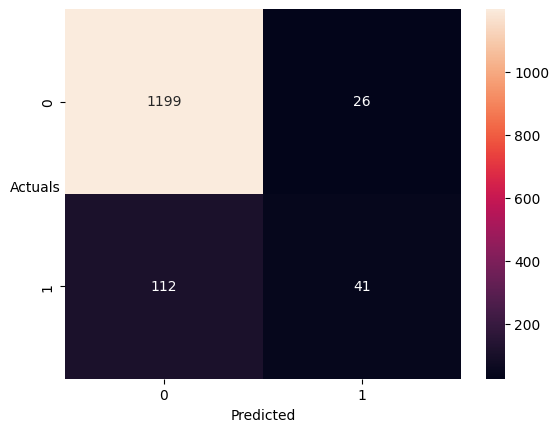

In [684]:
sns.heatmap((metrics.confusion_matrix(train_XY['Default'],y_pred)),annot=True,fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [685]:
print(metrics.classification_report(train_XY['Default'],y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1225
           1       0.61      0.27      0.37       153

    accuracy                           0.90      1378
   macro avg       0.76      0.62      0.66      1378
weighted avg       0.88      0.90      0.88      1378



In [686]:
# Choosing the optimal Threshold using ROC Curve

from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(train_XY['Default'],y_prob_pred_train)

In [687]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold.round(5)

0.07162

In [696]:
# Validating on the train set wit revised Threshold

# Prediction on the train set
y_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.11409:
        a=1
    else:
        a=0
    y_pred.append(a)

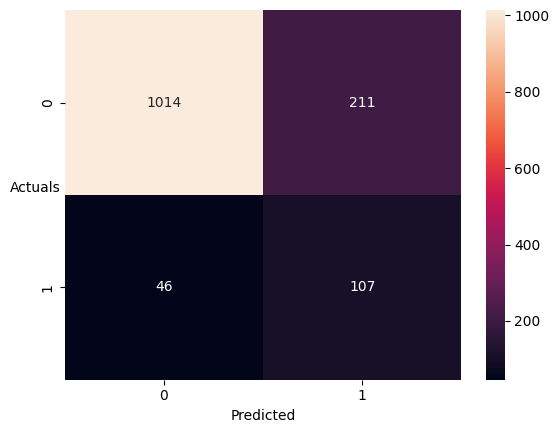

In [697]:
sns.heatmap((metrics.confusion_matrix(train_XY['Default'],y_pred)),annot=True,fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [698]:
print(metrics.classification_report(train_XY['Default'],y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1225
           1       0.34      0.70      0.45       153

    accuracy                           0.81      1378
   macro avg       0.65      0.76      0.67      1378
weighted avg       0.89      0.81      0.84      1378



validating test data :

In [699]:
y_prob_pred_test = model_9.predict(test_XY)

In [700]:
# Prediction on the test set
y_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.11409:
        a=1
    else:
        a=0
    y_pred_test.append(a)

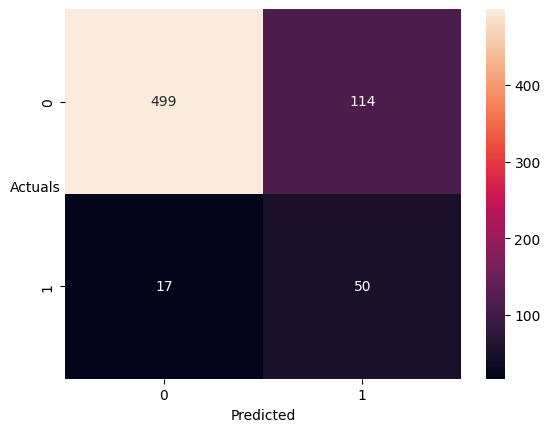

In [701]:
sns.heatmap((metrics.confusion_matrix(test_XY['Default'],y_pred_test)),annot=True,fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [702]:
print(metrics.classification_report(test_XY['Default'],y_pred_test, digits=2))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       613
           1       0.30      0.75      0.43        67

    accuracy                           0.81       680
   macro avg       0.64      0.78      0.66       680
weighted avg       0.90      0.81      0.84       680



# ROC CURVE :

ROC - AUC SCORE FOR TRAIN DATA : 0.8628304655195411


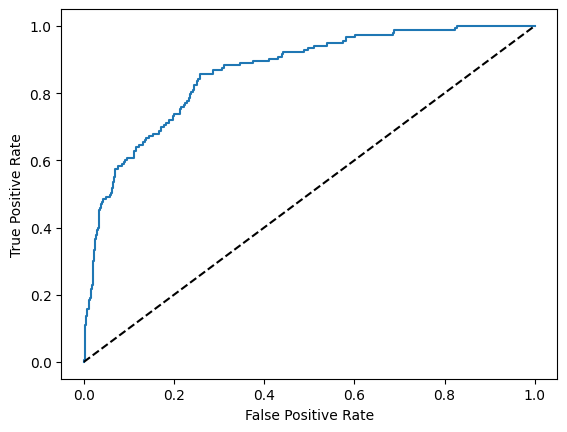

In [703]:
# ROC Curve for model_1
from sklearn.metrics import roc_auc_score
y_prob_pred_train = model_9.predict(train_XY.drop('Default', axis=1))
ROC_CURVE_LOG = roc_auc_score(train_XY['Default'], y_prob_pred_train)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %ROC_CURVE_LOG)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');

print('ROC - AUC SCORE FOR TRAIN DATA :', ROC_CURVE_LOG)

ROC-AUC SCORE FOR TEST DATA: 0.89


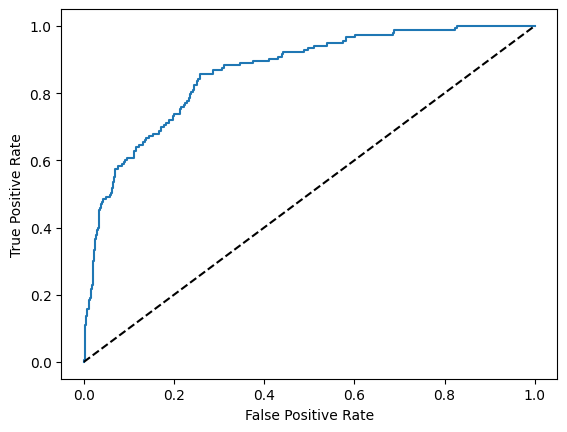

In [704]:
# Calculate the ROC-AUC score FOR TEST DATA
from sklearn.metrics import roc_auc_score
y_prob_pred_test = model_9.predict(test_XY.drop('Default', axis=1))
roc_auc_score = roc_auc_score(test_XY['Default'], y_prob_pred_test)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
# Print the ROC-AUC score
print(f"ROC-AUC SCORE FOR TEST DATA: {roc_auc_score:.2f}")

# PART A: Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [705]:
#1.8) Build a RANDOM FOREST Model on Train dset

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':[3,5,7],
    'min_samples_leaf':[5,10,15],
    'min_samples_split':[15,30,45],
    'n_estimators':[25,50]
}

rfcl=RandomForestClassifier()
grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid)

In [706]:
grid_search.fit(X_train, y_train) 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [707]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 15,
 'min_samples_split': 15,
 'n_estimators': 25}

In [708]:
best_grid=grid_search.best_estimator_

In [709]:
rf_pred_train=best_grid.predict(X_train)
rf_pred_test=best_grid.predict(X_test)

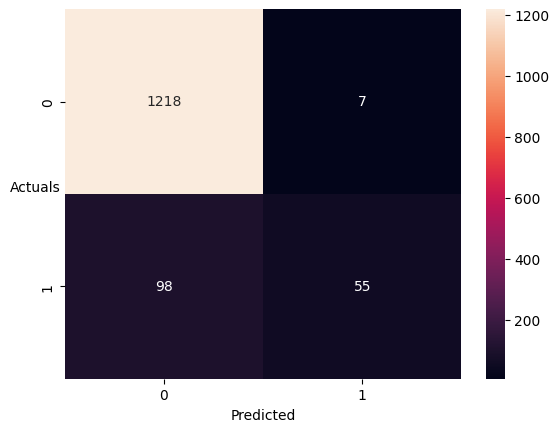

In [710]:
sns.heatmap((metrics.confusion_matrix(y_train,rf_pred_train)),annot=True,fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [711]:
print(metrics.classification_report(y_train,rf_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1225
           1       0.89      0.36      0.51       153

    accuracy                           0.92      1378
   macro avg       0.91      0.68      0.74      1378
weighted avg       0.92      0.92      0.91      1378



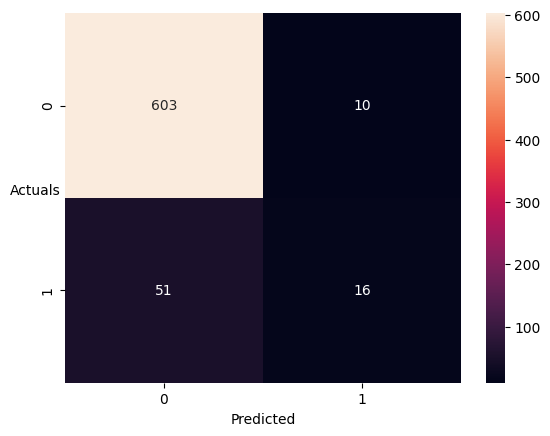

In [712]:
sns.heatmap((metrics.confusion_matrix(y_test,rf_pred_test)),annot=True,fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [713]:
print(metrics.classification_report(y_test,rf_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       613
           1       0.62      0.24      0.34        67

    accuracy                           0.91       680
   macro avg       0.77      0.61      0.65       680
weighted avg       0.89      0.91      0.89       680



ROC - AUC CURVE for Train data : 0.957156195811658


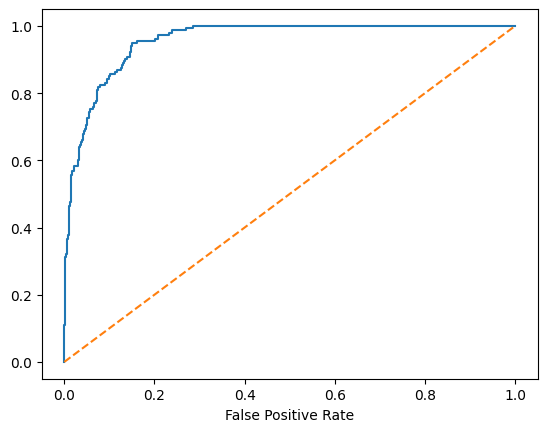

In [714]:
# Compute probabilities of positive class (class 1) for the test set
from sklearn.metrics import roc_auc_score
probs_train = best_grid.predict_proba(X_train)[:, 1]

# Compute the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, probs_train)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(y_train, probs_train)


plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')

print('ROC - AUC CURVE for Train data :',roc_auc)

ROC - AUC CURVE for Train data : 0.9082320859000267


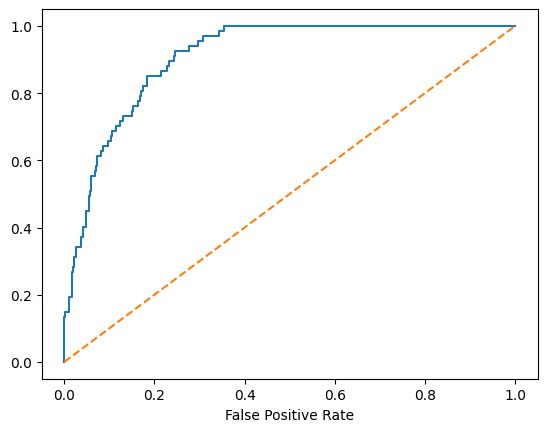

In [715]:
# Compute probabilities of positive class (class 1) for the test set
probs_test = best_grid.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs_test)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(y_test, probs_test)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
print('ROC - AUC CURVE for Train data :',roc_auc)

# PART A: Build a LDA Model on Train Dataset. Also showcase your model building approach

In [716]:
LDA = LinearDiscriminantAnalysis()
LDA

LinearDiscriminantAnalysis()

In [717]:
lda=LDA.fit(X_train,y_train)

In [718]:
pred_train_lda = lda.predict(X_train)
pred_test_lda = lda.predict(X_test)

# PART A: Validate the LDA Model on test Dataset and state the performance metrics. Also state interpretation from the model

TRAIN DATASET :

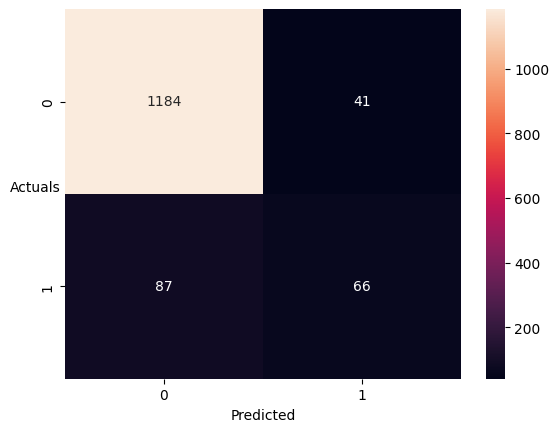

In [719]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_lda)),annot=True,fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [720]:
print(metrics.classification_report(y_train,pred_train_lda))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1225
           1       0.62      0.43      0.51       153

    accuracy                           0.91      1378
   macro avg       0.77      0.70      0.73      1378
weighted avg       0.90      0.91      0.90      1378



TEST DATASET :

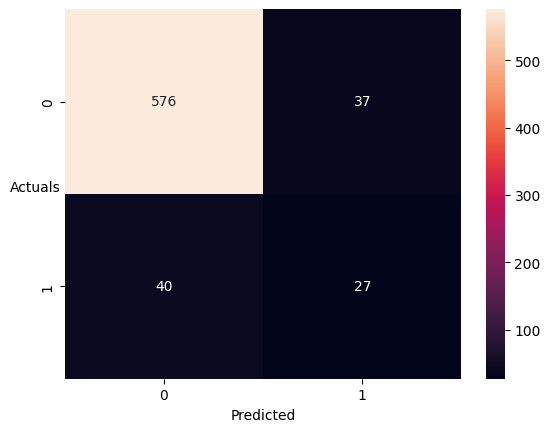

In [721]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_lda)),annot=True,fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [722]:
print(metrics.classification_report(y_test,pred_test_lda))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       613
           1       0.42      0.40      0.41        67

    accuracy                           0.89       680
   macro avg       0.68      0.67      0.67       680
weighted avg       0.88      0.89      0.89       680



ROC-AUC CURVE FOR LDA TRAIN MODEL : 0.8965292783780179


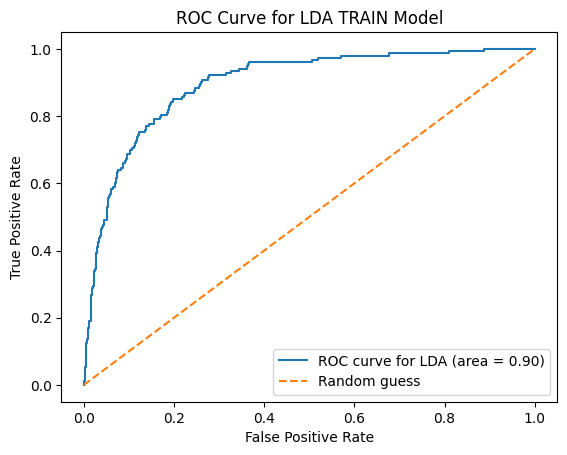

In [723]:
# ROC curve for lda_model
probs_train_lda = lda.predict_proba(X_train)[:, 1] 
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_train, probs_train_lda)
roc_auc_lda = roc_auc_score(y_train, probs_train_lda) # Compute the area under the ROC curve

plt.plot(fpr_lda, tpr_lda, label=f'ROC curve for LDA (area = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
print('ROC-AUC CURVE FOR LDA TRAIN MODEL :',roc_auc_lda)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA TRAIN Model')
plt.legend(loc="lower right")
plt.show()

ROC-AUC CURVE FOR LDA TEST MODEL : 0.8759952277762899


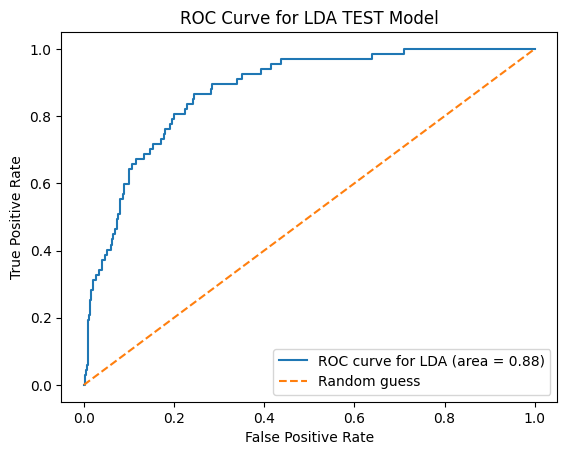

In [724]:
# ROC curve for lda_model
probs_test_lda = lda.predict_proba(X_test)[:, 1] 
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, probs_test_lda)
roc_auc_lda = roc_auc_score(y_test, probs_test_lda) # Compute the area under the ROC curve

plt.plot(fpr_lda, tpr_lda, label=f'ROC curve for LDA (area = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
print('ROC-AUC CURVE FOR LDA TEST MODEL :',roc_auc_lda)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA TEST Model')
plt.legend(loc="lower right")
plt.show()

# PART A: Compare the performances of Logistic Regression, Random Forest, and LDA models (include ROC curve)

In [729]:
# Comparison table for logistic Regression , Randomforest classifier and LDA :
# Compute performance metrics for the rfcl model


train_accuracy_log = metrics.accuracy_score(train_XY['Default'],y_pred)
test_accuracy_log = metrics.accuracy_score(test_XY['Default'],y_pred_test)

train_precision_log = metrics.precision_score(train_XY['Default'],y_pred)
test_precision_log = metrics.precision_score(test_XY['Default'],y_pred_test)

train_recall_log = metrics.recall_score(train_XY['Default'],y_pred)
test_recall_log = metrics.recall_score(test_XY['Default'],y_pred_test)


rf_pred_train = best_grid.predict(X_train)
rf_pred_test_rfcl = best_grid.predict(X_test)

train_accuracy_rfcl = metrics.accuracy_score(y_train, rf_pred_train)
test_accuracy_rfcl = metrics.accuracy_score(y_test, rf_pred_test)

train_precision_rfcl = metrics.precision_score(y_train, rf_pred_train)
test_precision_rfcl = metrics.precision_score(y_test, rf_pred_test)

train_recall_rfcl = metrics.recall_score(y_train, rf_pred_train)
test_recall_rfcl = metrics.recall_score(y_test, rf_pred_test)

# Create a dictionary to store the performance metrics for the models
model_metrics = {
    'Model': ['LOG','rfcl', 'LDA'],
    'Train Accuracy': [train_accuracy_log,train_accuracy_rfcl, metrics.accuracy_score(y_train, pred_train_lda)],
    'Test Accuracy': [test_accuracy_log,test_accuracy_rfcl, metrics.accuracy_score(y_test, pred_test_lda)],
    'Train Precision': [train_precision_log,train_precision_rfcl, metrics.precision_score(y_train, pred_train_lda)],
    'Test Precision': [test_precision_log,test_precision_rfcl, metrics.precision_score(y_test, pred_test_lda)],
    'Train Recall': [train_recall_log,train_recall_rfcl, metrics.recall_score(y_train, pred_train_lda)],
    'Test Recall': [test_recall_log,test_recall_rfcl, metrics.recall_score(y_test, pred_test_lda)],
    'ROC AUC': [ROC_CURVE_LOG,roc_auc, roc_auc_lda]
}

# Create a DataFrame from the model_metrics dictionary
comparison_table = pd.DataFrame(model_metrics)

In [730]:
from tabulate import tabulate

def display_comparison_table(dataframe):
    table_format = "grid"  # You can change this to "fancy_grid" or "pretty" for different table styles
    print(tabulate(dataframe, headers='keys', tablefmt=table_format))

# Call the function with the comparison_table DataFrame
display_comparison_table(comparison_table)

+----+---------+------------------+-----------------+-------------------+------------------+----------------+---------------+-----------+
|    | Model   |   Train Accuracy |   Test Accuracy |   Train Precision |   Test Precision |   Train Recall |   Test Recall |   ROC AUC |
+====+=========+==================+=================+===================+==================+================+===============+===========+
|  0 | LOG     |         0.813498 |        0.807353 |          0.336478 |         0.304878 |       0.699346 |      0.746269 |  0.86283  |
+----+---------+------------------+-----------------+-------------------+------------------+----------------+---------------+-----------+
|  1 | rfcl    |         0.923803 |        0.910294 |          0.887097 |         0.615385 |       0.359477 |      0.238806 |  0.908232 |
+----+---------+------------------+-----------------+-------------------+------------------+----------------+---------------+-----------+
|  2 | LDA     |         0.907112 

# PART B: (25 Marks)
Problem Statement:

The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights. You are expected to do the Market Risk Analysis using Python.

In [771]:
sk=pd.read_csv('F:\PGP_DSBA\FCR\Market+Risk+Dataset.csv')
sk.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [772]:
sk.tail()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [773]:
sk.shape

(314, 11)

In [774]:
sk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [775]:
sk.describe()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
count,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00
mean,511.34,114.56,636.68,540.74,59.10,14806.41,633.47,147.63,53.71,372.66
std,135.95,22.51,102.88,115.84,15.81,4288.28,171.86,65.88,31.25,202.26
min,234.00,64.00,284.00,263.00,21.00,5543.00,338.00,53.00,3.00,14.00
25%,424.00,96.00,572.00,470.50,47.00,10952.25,478.50,88.25,25.25,243.25
50%,466.50,115.00,625.00,528.00,57.00,16018.50,614.00,142.50,53.00,376.00
75%,630.75,134.00,678.00,605.25,71.75,17773.25,785.00,182.75,82.00,534.00
max,810.00,157.00,956.00,808.00,104.00,24806.00,1089.00,338.00,117.00,871.00


# Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

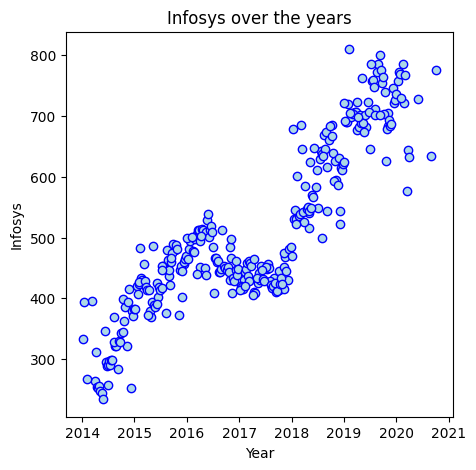

In [786]:
plt.figure(figsize = (5, 5))
sk['date'] = [pd.to_datetime(d) for d in sk['Date']]
plt.scatter(sk['date'], sk['Infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

In [777]:
sk.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,2014-03-31,264,69,455,263,68,5543,555,298,83,278
1,2014-07-04,257,68,458,276,70,5728,610,279,84,303
2,2014-04-14,254,68,454,270,68,5649,607,279,83,280
3,2014-04-21,253,68,488,283,68,5692,604,274,83,282
4,2014-04-28,256,65,482,282,63,5582,611,238,79,243


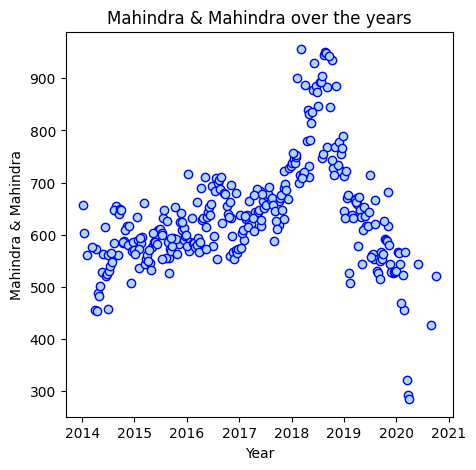

In [787]:
plt.figure(figsize = (5, 5))
sk['date'] = [pd.to_datetime(d) for d in sk['Date']]
plt.scatter(sk['date'], sk['Mahindra & Mahindra'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Mahindra & Mahindra')
plt.title('Mahindra & Mahindra over the years')
plt.show()

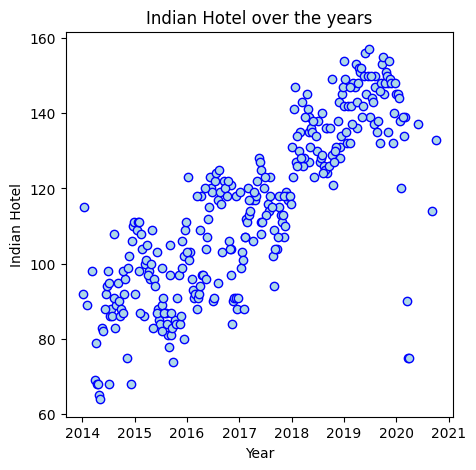

In [788]:
plt.figure(figsize = (5, 5))
sk['date'] = [pd.to_datetime(d) for d in sk['Date']]
plt.scatter(sk['date'], sk['Indian Hotel'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Indian Hotel')
plt.title('Indian Hotel over the years')
plt.show()

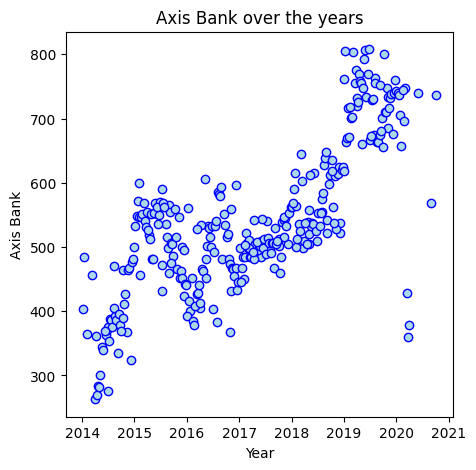

In [789]:
plt.figure(figsize = (5, 5))
sk['date'] = [pd.to_datetime(d) for d in sk['Date']]
plt.scatter(sk['date'], sk['Axis Bank'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Axis Bank')
plt.title('Axis Bank over the years')
plt.show()

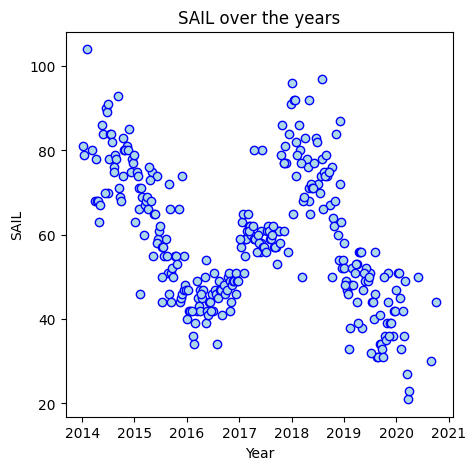

In [790]:
plt.figure(figsize = (5, 5))
sk['date'] = [pd.to_datetime(d) for d in sk['Date']]
plt.scatter(sk['date'], sk['SAIL'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.title('SAIL over the years')
plt.show()

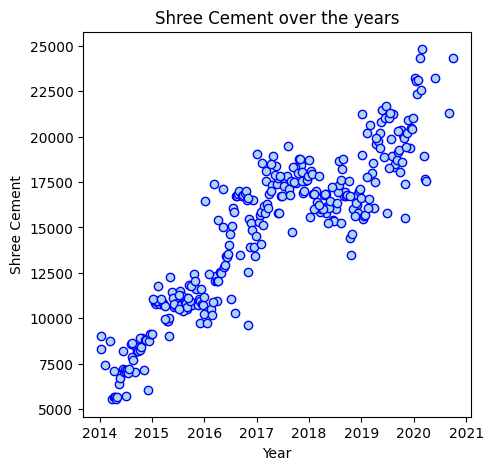

In [791]:
plt.figure(figsize = (5, 5))
sk['date'] = [pd.to_datetime(d) for d in sk['Date']]
plt.scatter(sk['date'], sk['Shree Cement'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Shree Cement')
plt.title('Shree Cement over the years')
plt.show()

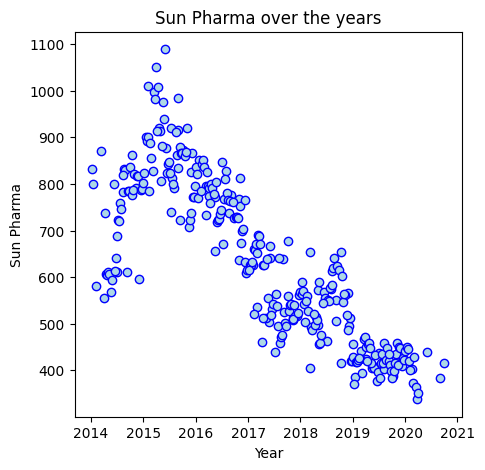

In [792]:
plt.figure(figsize = (5, 5))
sk['date'] = [pd.to_datetime(d) for d in sk['Date']]
plt.scatter(sk['date'], sk['Sun Pharma'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Sun Pharma')
plt.title('Sun Pharma over the years')
plt.show()

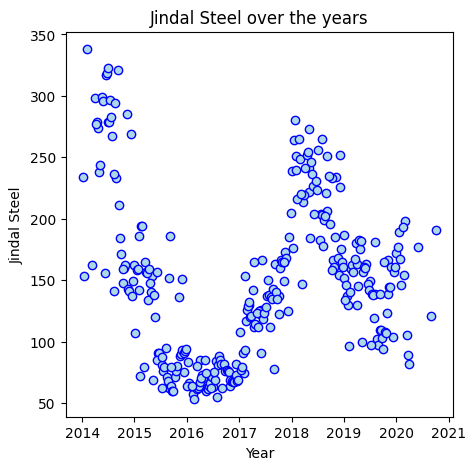

In [793]:
plt.figure(figsize = (5, 5))
sk['date'] = [pd.to_datetime(d) for d in sk['Date']]
plt.scatter(sk['date'], sk['Jindal Steel'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Jindal Steel')
plt.title('Jindal Steel over the years')
plt.show()

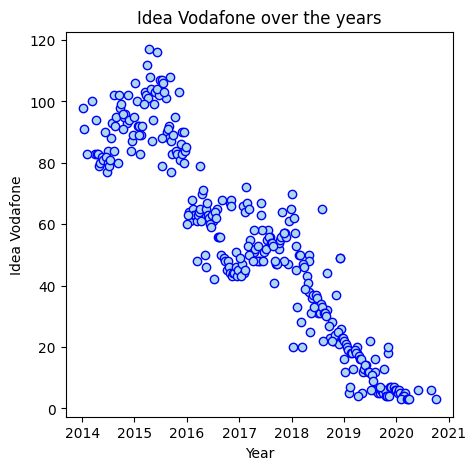

In [794]:
plt.figure(figsize = (5, 5))
sk['date'] = [pd.to_datetime(d) for d in sk['Date']]
plt.scatter(sk['date'], sk['Idea Vodafone'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Idea Vodafone')
plt.title('Idea Vodafone over the years')
plt.show()

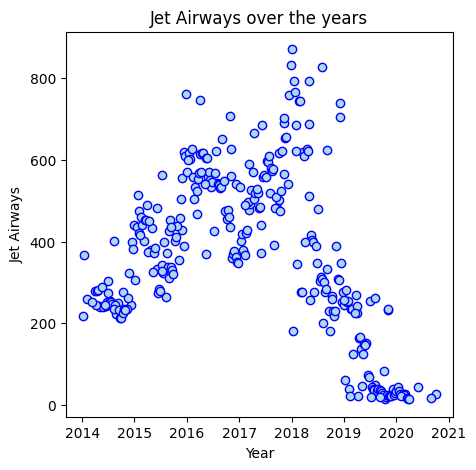

In [795]:
plt.figure(figsize = (5, 5))
sk['date'] = [pd.to_datetime(d) for d in sk['Date']]
plt.scatter(sk['date'], sk['Jet Airways'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Jet Airways')
plt.title('Jet Airways over the years')
plt.show()

# PART B: Calculate Returns for all stocks with inference

In [796]:
stock_returns = np.log(sk.drop(['Date','date'],axis=1)).diff(axis = 0) 

In [797]:
stock_returns.shape

(314, 10)

In [798]:
stock_returns.head()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.03,-0.01,0.01,0.05,0.03,0.03,0.09,-0.07,0.01,0.09
2,-0.01,0.00,-0.01,-0.02,-0.03,-0.01,-0.00,0.00,-0.01,-0.08
3,-0.00,0.00,0.07,0.05,0.00,0.01,-0.00,-0.02,0.00,0.01
4,0.01,-0.05,-0.01,-0.00,-0.08,-0.02,0.01,-0.14,-0.05,-0.15


# PART B: Calculate Stock Means and Standard Deviation for all stocks with inference

In [801]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.00
Indian Hotel           0.00
Mahindra & Mahindra   -0.00
Axis Bank              0.00
SAIL                  -0.00
Shree Cement           0.00
Sun Pharma            -0.00
Jindal Steel          -0.00
Idea Vodafone         -0.01
Jet Airways           -0.01
dtype: float64

Calculating stock standard deviation

In [783]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys               0.04
Indian Hotel          0.05
Mahindra & Mahindra   0.04
Axis Bank             0.05
SAIL                  0.06
Shree Cement          0.04
Sun Pharma            0.05
Jindal Steel          0.08
Idea Vodafone         0.10
Jet Airways           0.10
dtype: float64

In [784]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.00,0.04
Indian Hotel,0.00,0.05
Mahindra & Mahindra,-0.00,0.04
Axis Bank,0.00,0.05
SAIL,-0.00,0.06
Shree Cement,0.00,0.04
Sun Pharma,-0.00,0.05
Jindal Steel,-0.00,0.08
Idea Vodafone,-0.01,0.10
Jet Airways,-0.01,0.10


# PART B: Draw a plot of Stock Means vs Standard Deviation and state your inference

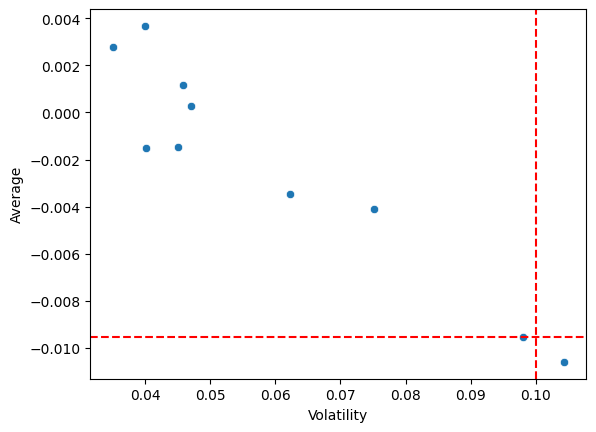

In [805]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(x=df['Volatility'],y= df['Average'])
plot.axvline(x=0.10,linestyle='--', color = "red")
plot.axhline(y=-0.00954,linestyle='--', color = "red")
plt.show()

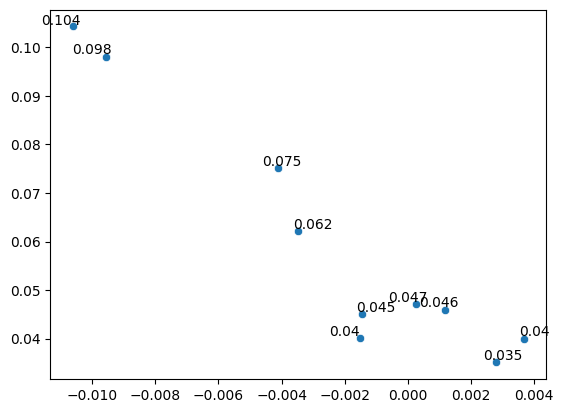

In [814]:
plot = sns.scatterplot(x=stock_means,y= stock_sd)
for (xi, yi) in zip(stock_means.round(3), stock_sd.round(3)):
    plt.text(xi, yi, yi, va='bottom', ha='center')